In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

text account_type
0  we have sitting democrat us senator on trial f...        Right
1  marshawn lynch arrives to game in anti trump s...        Right
2  daughter of fallen navy sailor delivers powerf...        Right
3  just in president trump dedicates presidents c...        Right
4   respecting our national anthem standforouranthem        Right

In [3]:
my_df.info

<bound method DataFrame.info of                                                      text account_type
0       we have sitting democrat us senator on trial f...        Right
1       marshawn lynch arrives to game in anti trump s...        Right
2       daughter of fallen navy sailor delivers powerf...        Right
3       just in president trump dedicates presidents c...        Right
4        respecting our national anthem standforouranthem        Right
...                                                   ...          ...
239995    gov deal to speak about reconstruction progress        local
239996  police man arrested after dragging clayton co ...        local
239997  kids to alpharetta firefighters did not know o...        local
239998    best places to take wedding pictures in atlanta        local
239999  police looking for person of interest in walma...        local

[240000 rows x 2 columns]>

#### Delete null values

In [4]:
my_df[my_df.isnull().any(axis=1)].head()

text account_type
6    NaN        Right
135  NaN        Right
146  NaN        Right
149  NaN        Right
163  NaN        Right

In [5]:
np.sum(my_df.isnull().any(axis=1))

37685

In [6]:
my_df.isnull().any(axis=0)

text             True
account_type    False
dtype: bool

In [7]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202315 entries, 0 to 202314
Data columns (total 2 columns):
text            202315 non-null object
account_type    202315 non-null object
dtypes: object(2)
memory usage: 3.1+ MB


In [8]:
np.sum(my_df.isnull().any(axis=1))

0

#### Left Wordcloud

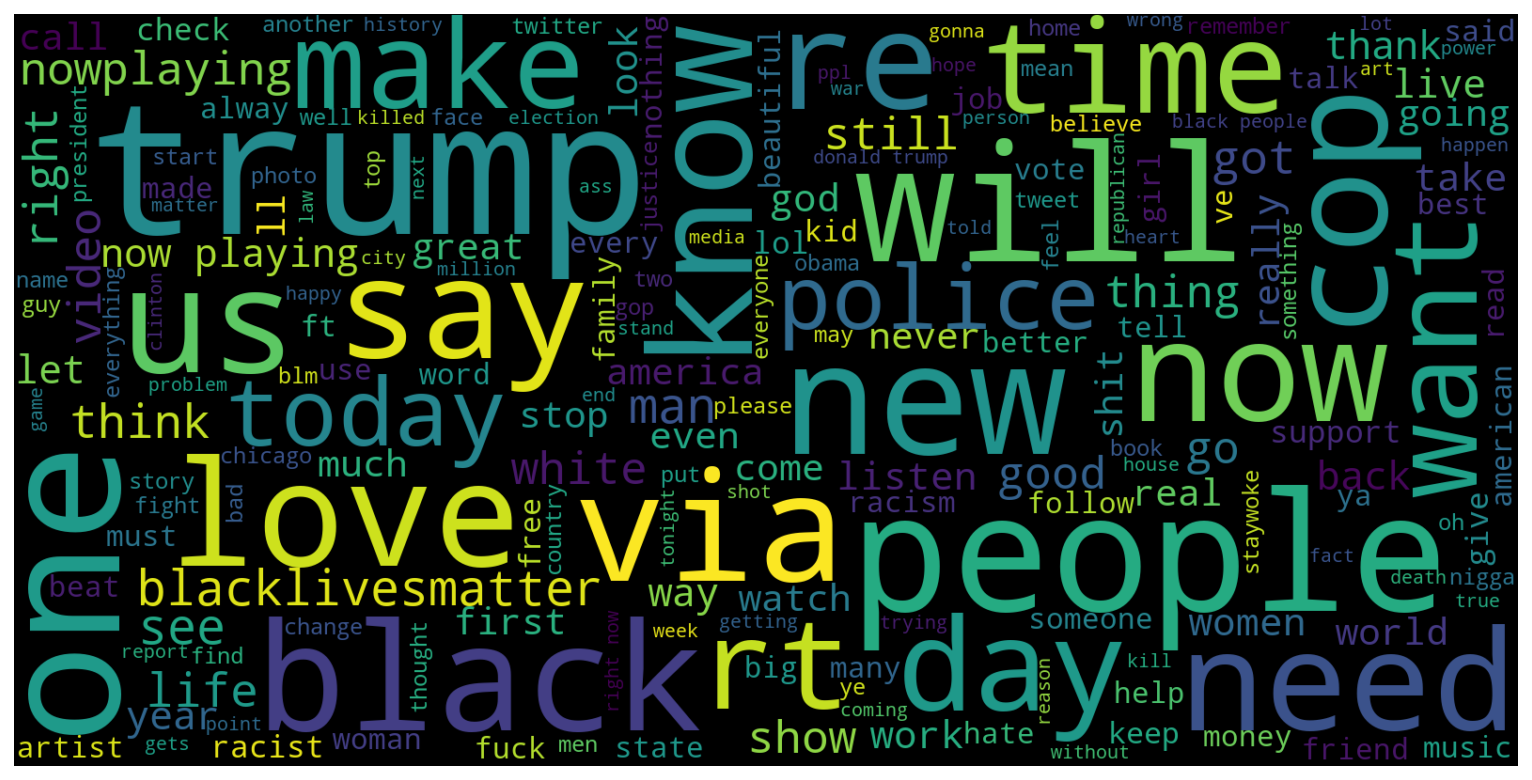

In [54]:
left_tweets = my_df[my_df.account_type == "Left"]
left_string = []
for t in left_tweets.text:
    left_string.append(t)
left_string = pd.Series(left_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(left_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [88]:
print(left_string)

blacklivesmatter blm equality equalrights so if you pay more taxes you have more rights this how it works some of you black students force the university to divest million in private prisons blacktwitter racist maine gov on drug problem racistscum idiot can breathe video of police dragging barbara dawson from the hospital blm cop sentenced to five years for pointing gun in man face case re opened cop shoot man times as he was face down in handcuffs policebrutality at last nypd cop in eric garner death faces departmental charges blacklivesmatter policestate policebrutality that feel when you find this new great song and listen to it on repeat what the ck policebrutality policestate same old story rich and white your alright end of story equality equalrights obama delivers his final state of the union address but said nothing about blm why did they count slavery as incarceration policestate policebrutality incarceration on this day in johnson appoints first african american cabinet membe

In [91]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(left_string)
print(tokenized_word)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



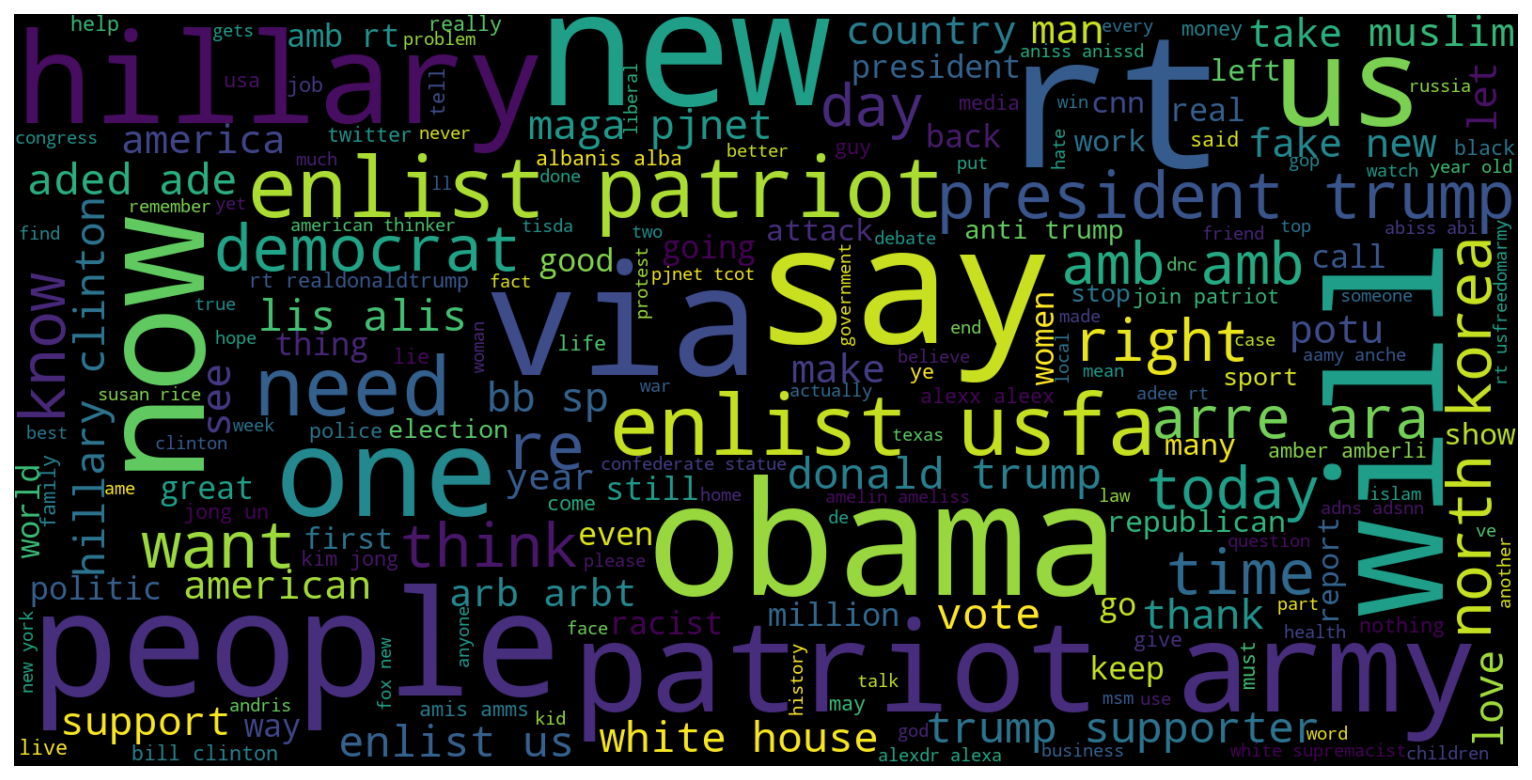

In [55]:
right_tweets = my_df[my_df.account_type == "Right"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Russian

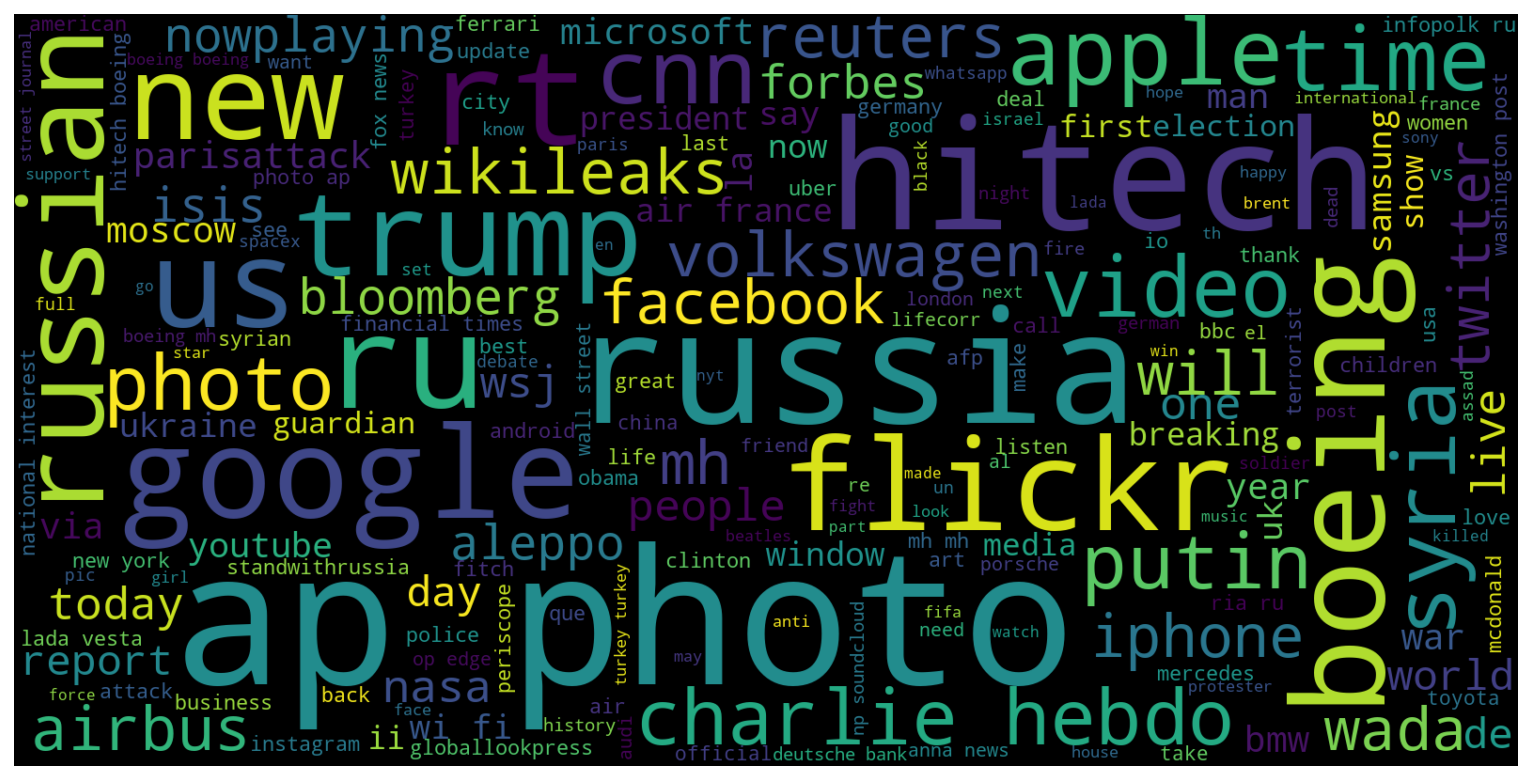

In [98]:
rus_tweets = my_df[my_df.account_type == "Russian"]
rus_string = []
for t in rus_tweets.text:
    rus_string.append(t)
rus_string = pd.Series(rus_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(rus_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Tokenize

In [99]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(rus_string)
print(tokenized_word)

['reuters', 'porsche', 'panamera', 'lada', 'mail', 'ru', 'google', 'chrome', 'aliexpress', 'youtube', 'ufc', 'fox', 'news', 'nyt', 'who', 'the', 'fuck', 'is', 'pychkov', 'russia', 'today', 'careless', 'dangerous', 'driving', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'do', 'not', 'worry', 'be', 'happy', 'fox', 'news', 'deus', 'vult', 'spacex', 'ferrari', 'iphone', 'russia', 'at', 'the', 'un', 'session', 'on', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'you', 'are', 'welcome', 'mad', 'magazine', 'elcin', 'palace', 'halle', 'fuckin', 'lujah', 'hyperloop', 'transparency', 'international', 'land', 'cruiser', 'deus', 'vult', 'duty', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'is', 'life', 'putin', 'is', 'love', 'silent', 'hill', 'spacex', 'google', 'telegram', 'telegram', 'spacex', 'mma', 'apple', 'transparency', 'ii', 'petya', 'valley', 'forge', 'millitary', 'college', 'tesla'

In [100]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 8721 samples and 34320 outcomes>


In [101]:
fdist.most_common(20)

[('the', 720),
 ('to', 582),
 ('in', 542),
 ('of', 527),
 ('photo', 316),
 ('ap', 297),
 ('on', 280),
 ('and', 241),
 ('hitech', 233),
 ('for', 224),
 ('russia', 210),
 ('is', 201),
 ('boeing', 195),
 ('apple', 162),
 ('by', 160),
 ('ru', 151),
 ('with', 151),
 ('rt', 140),
 ('you', 139),
 ('mh', 135)]

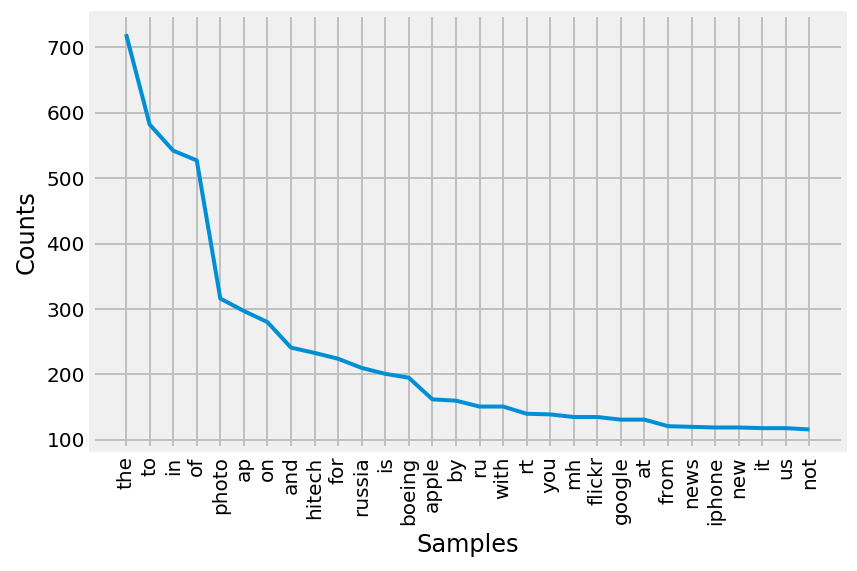

In [102]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Remove Stopwords

In [104]:
#from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/computer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'so', 'am', "needn't", 'than', 'it', "you're", 'or', 'of', 'do', 'for', 'your', "isn't", 'his', 'her', "you'd", 'ain', 'very', 'which', 'once', 'on', 't', "don't", 'don', 'same', 'won', 'an', 'after', 'just', 'during', 'm', 'other', 'the', 'ma', 'should', "that'll", 'did', 'hers', 'no', 'can', 'more', 'll', 'y', 'such', 'through', 'too', 'haven', 'was', 'd', 'from', 'most', 'me', 'when', 'we', "won't", 'i', 'hasn', "haven't", 'yourself', 'herself', 'over', 'between', 'wasn', 'being', 'only', 'them', 'some', 'in', "hadn't", 'myself', 'they', 'all', 'didn', 'is', 'few', 'because', "shouldn't", 'each', 'mightn', "mightn't", 'out', 'by', 'been', 'ourselves', 'be', 'own', 'about', "aren't", 'its', 'my', "you've", 'isn', 'mustn', 've', 's', 'were', 'at', 'below', 'couldn', 'while', "couldn't", 'doing', 'now', 'does', 'needn', "it's", 'shan', 'o', 'wouldn', "shan't", 'what', "wouldn't", "hasn't", 'with', 'ours', 'until', 'against', 're', 'aren', 'whom', 'nor', "didn't", 'having', 'theirs', '

In [107]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['reuters', 'porsche', 'panamera', 'lada', 'mail', 'ru', 'google', 'chrome', 'aliexpress', 'youtube', 'ufc', 'fox', 'news', 'nyt', 'fuck', 'pychkov', 'russia', 'today', 'careless', 'dangerous', 'driving', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'worry', 'happy', 'fox', 'news', 'deus', 'vult', 'spacex', 'ferrari', 'iphone', 'russia', 'un', 'session', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'welcome', 'mad', 'magazine', 'elcin', 'palace', 'halle', 'fuckin', 'lujah', 'hyperloop', 'transparency', 'international', 'land', 'cruiser', 'deus', 'vult', 'duty', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'life', 'putin', 'love', 'silent', 'hill', 'spacex', 'google', 'telegram', 'telegram', 'spacex', 'mma', 'apple', 'transparency', 'ii', 'petya', 'valley', 'forge', 'millitary', 'college', 'tesla', 'kia', 'trump', 'imagine', 'ronald', 'reagan', 'idolizing', 'som

In [108]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 8594 samples and 27393 outcomes>


In [109]:
fdist.most_common(20)

[('photo', 316),
 ('ap', 297),
 ('hitech', 233),
 ('russia', 210),
 ('boeing', 195),
 ('apple', 162),
 ('ru', 151),
 ('rt', 140),
 ('mh', 135),
 ('flickr', 135),
 ('google', 131),
 ('news', 120),
 ('iphone', 119),
 ('new', 119),
 ('us', 118),
 ('trump', 112),
 ('russian', 103),
 ('reuters', 98),
 ('cnn', 94),
 ('syria', 88)]

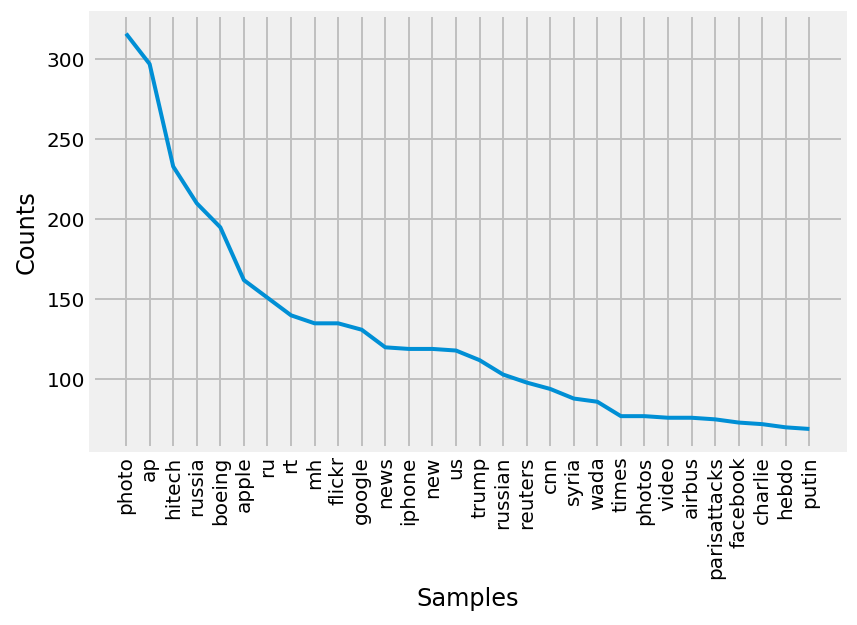

In [110]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Lexicon normalization - Stemming

In [112]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['reuter', 'porsch', 'panamera', 'lada', 'mail', 'ru', 'googl', 'chrome', 'aliexpress', 'youtub', 'ufc', 'fox', 'news', 'nyt', 'fuck', 'pychkov', 'russia', 'today', 'careless', 'danger', 'drive', 'tesla', 'starter', 'pack', 'cnn', 'ferrari', 'worri', 'happi', 'fox', 'news', 'deu', 'vult', 'spacex', 'ferrari', 'iphon', 'russia', 'un', 'session', 'syria', 'ulitsa', 'nineteen', 'oh', 'five', 'goda', 'instagram', 'rage', 'pokemongo', 'welcom', 'mad', 'magazin', 'elcin', 'palac', 'hall', 'fuckin', 'lujah', 'hyperloop', 'transpar', 'intern', 'land', 'cruiser', 'deu', 'vult', 'duti', 'free', 'aliexpress', 'serb', 'collemassari', 'dimon', 'dimon', 'everyday', 'hustlin', 'fox', 'news', 'putin', 'life', 'putin', 'love', 'silent', 'hill', 'spacex', 'googl', 'telegram', 'telegram', 'spacex', 'mma', 'appl', 'transpar', 'ii', 'petya', 'valley', 'forg', 'millitari', 'colleg', 'tesla', 'kia', 'trump', 'imagin', 'ronald', 'reagan', 'idol', 'someon', 'like', 'putin', 'via', 'porsch', '

#### Lemmatization 

In [117]:
#Lexicon Normalization
#performing stemming and Lemmatization
import nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "driving"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: drive
Stemmed Word: drive


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/computer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### POS Tagging

In [118]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [124]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=stemmed_words, size=100, window=5, min_count=5, workers=4, sg=0)
model_ted.wv.most_similar('note')

KeyError: "word 'note' not in vocabulary"

#### Arabic

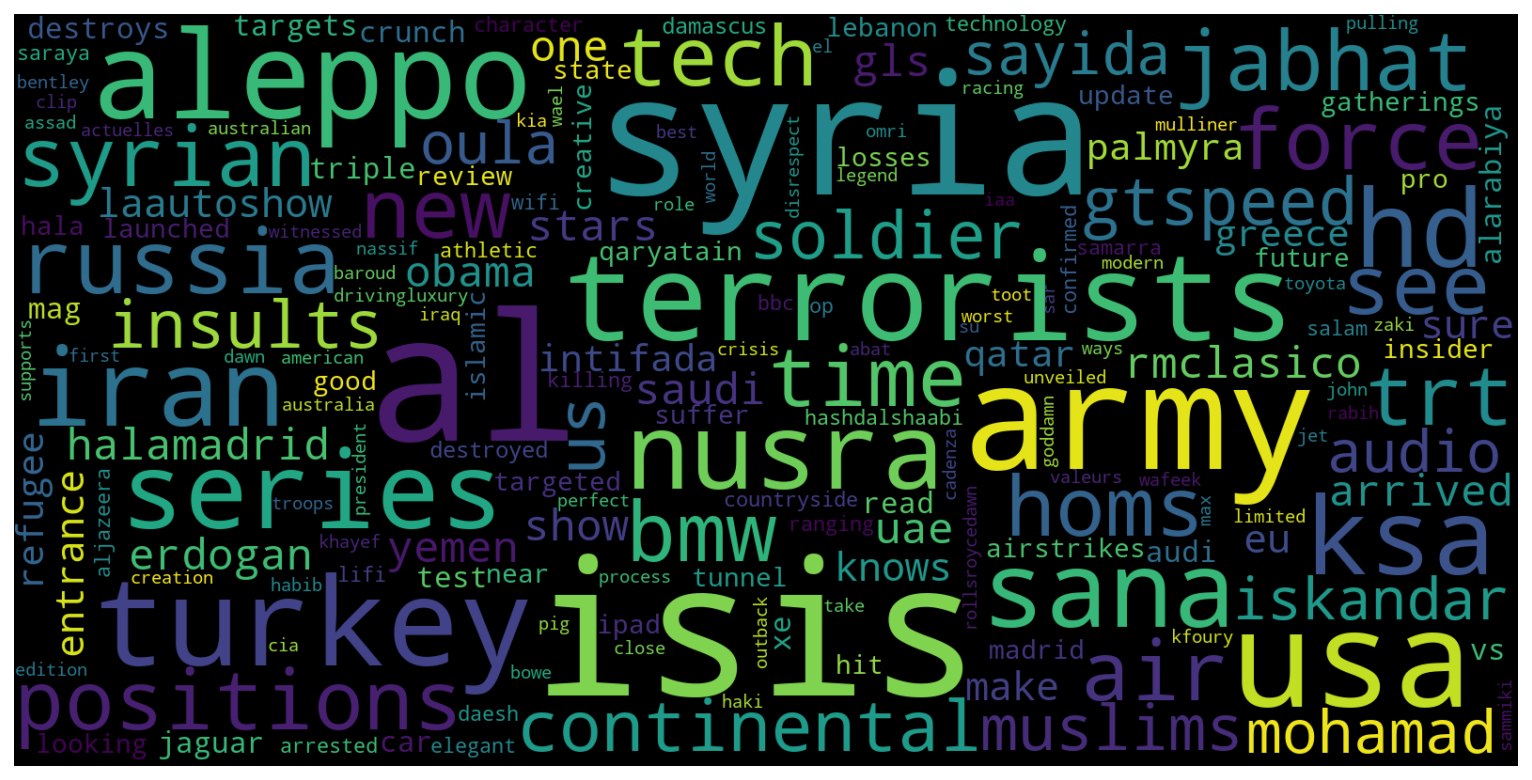

In [92]:
right_tweets = my_df[my_df.account_type == "Arabic"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [93]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(right_string)
print(tokenized_word)

['usa', 'isis', 'iran', 'iran', 'russia', 'syria', 'usa', 'obama', 'saudi', 'yemen', 'uae', 'turkey', 'erdogan', 'hd', 'rmclasico', 'halamadrid', 'isis', 'ksa', 'syria', 'usa', 'isis', 'one', 'of', 'the', 'stars', 'of', 'the', 'show', 'the', 'gls', 'has', 'arrived', 'at', 'the', 'laautoshow', 'it', 'sure', 'knows', 'how', 'to', 'make', 'an', 'entrance', 'iran', 'isis', 'usa', 'isis', 'ksa', 'syria', 'isis', 'usa', 'eu', 'palmyra', 'syria', 'intifada', 'ksa', 'qatar', 'russia', 'syria', 'greece', 'refugee', 'the', 'army', 'destroys', 'positions', 'for', 'isis', 'and', 'jabhat', 'al', 'nusra', 'terrorists', 'in', 'aleppo', 'aleppo', 'sana', 'the', 'syrian', 'army', 'crunch', 'time', 'we', 'triple', 'test', 'new', 'audi', 'vs', 'jaguar', 'xe', 'bmw', 'series', 'in', 'car', 'mag', 'read', 'alarabiya', 'army', 'targets', 'terrorists', 'gatherings', 'in', 'aleppo', 'aleppo', 'sana', 'the', 'army', 'air', 'force', 'targeted', 'the', 'islamic', 'state', 'isis', 'positions', 'near', 'al', 'qary

In [94]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 211 samples and 332 outcomes>


In [96]:
fdist.most_common(20)

[('the', 18),
 ('isis', 10),
 ('in', 10),
 ('al', 9),
 ('syria', 8),
 ('army', 6),
 ('usa', 5),
 ('to', 5),
 ('turkey', 4),
 ('and', 4),
 ('terrorists', 4),
 ('aleppo', 4),
 ('iran', 3),
 ('hd', 3),
 ('ksa', 3),
 ('of', 3),
 ('for', 3),
 ('nusra', 3),
 ('sana', 3),
 ('series', 3)]

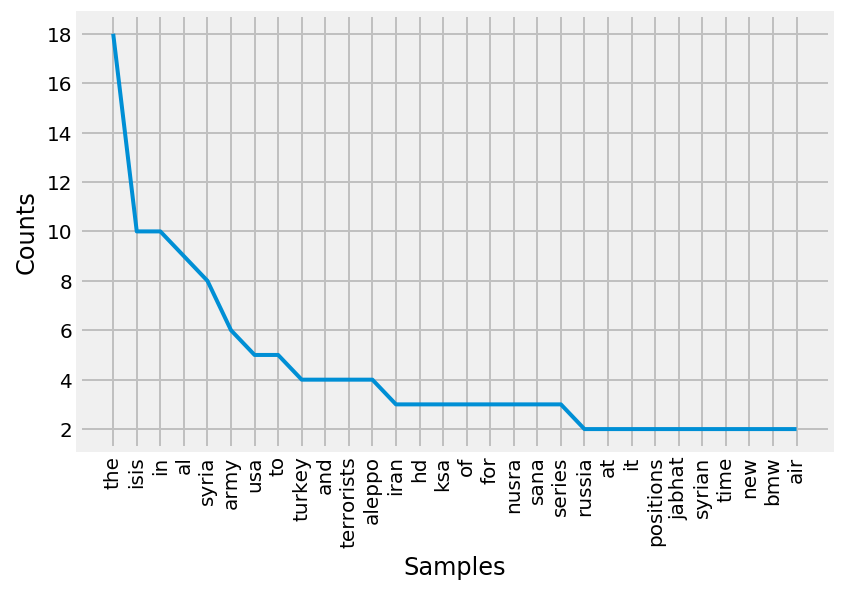

In [97]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Hashtager

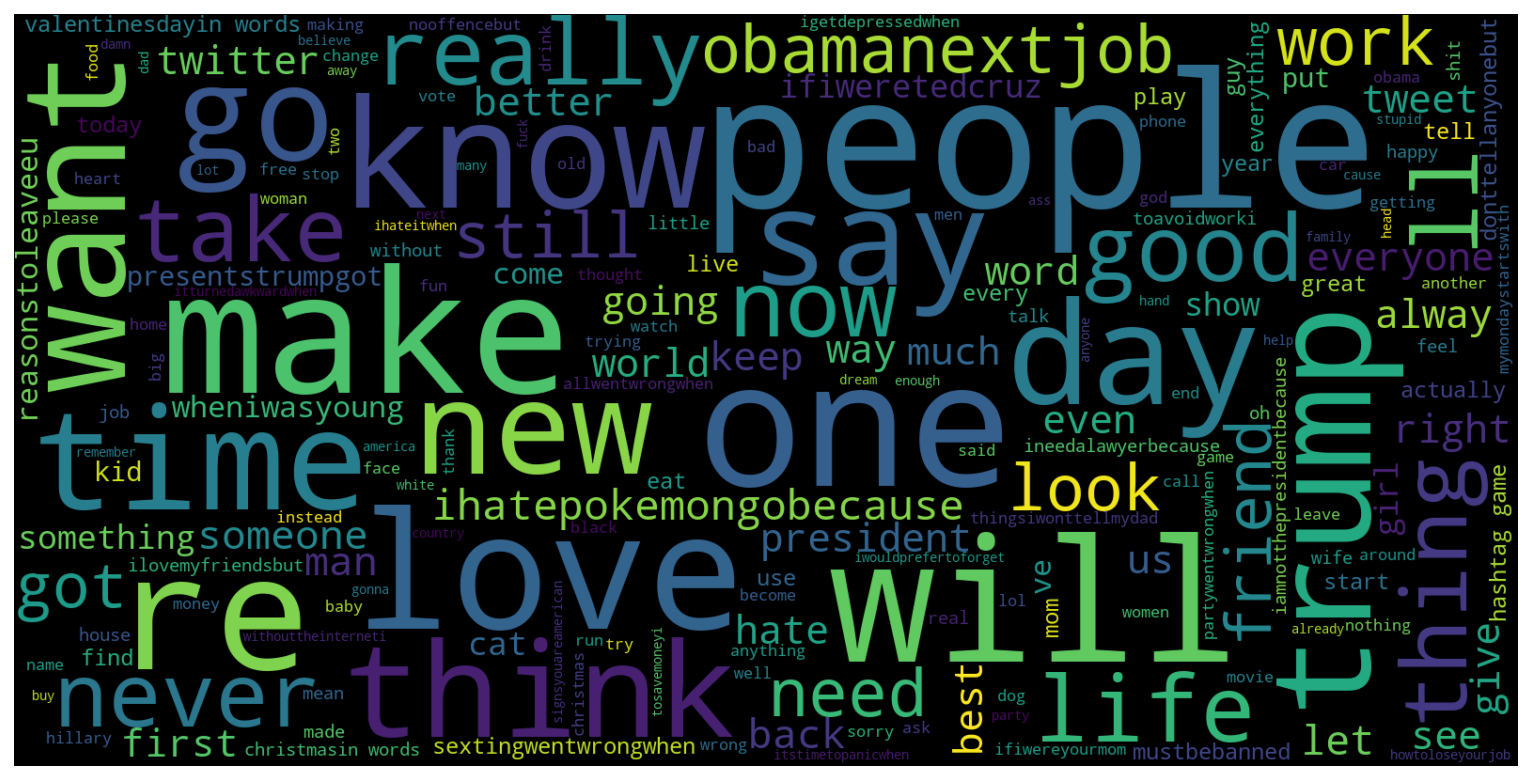

In [57]:
right_tweets = my_df[my_df.account_type == "Hashtager"]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
for t in left_tweets.text[:20000]:
    if 'trump' in t:
        print(t)

so walks in the bar and bibletrumping twocorinthians
aerosmith lead singer steven tyler told donaldtrump stop using dream on because fuck you thats why
how donaldtrump comes up with his ideas
trump is always on the wrong side of the argument smh
trump never has stated which side of the black lives matter debate he is on
blacklivesmatter protesters attack trump supporters trump supporters blamed for violence
donald trump has said he wants to bans muslims but hillary clinton has already bombed muslims tytlive
spread this hillary animals harass and assault homeless woman defending trump hillarysemails maga
snoopdogg roasting donaldtrump happy to see stuff like dat
snoopdogg roasting donaldtrump rap blacklivesmatter president nobodyforapresident blacktwitter blackpower
president donald trump scaremein words
kanye west says he would have voted for donald trump
ya know what no blacks would ever support trump for he tears america apart with his nazi style ideas
too bad lot of americans are ir

In [59]:
for t in right_tweets.text[:20000]:
    if 'trump' in t:
        print(t)

in all seriousness if sessions goes after porno trump is gonna lose the anime nazis once and for all
sometimestwittermakesme grateful that ppl around the country and the world agree that trump is hateful idiot
trump death aleppo nazis in words
harambe brexit donald trump in words
trump celebrity deaths clowns in words
in words make america great again thankstrump
clinton trump brexit terror in words
breaking trumpleaks donald trump owns stock in carrier corporations parent company rt the out of this cnn msnbc amjoy
surprise trumplies douchepence
dtf deplorable trump flunkies alternativeacronyminterpretations
howtoescapeadate if your date is trump supporter say you help illegals cross the border
rejectedstatueoflibertysigns are you white are you christian do you pledge allegiance to trump scans phone you may enter
theresa may and trump holding hands rejectedlegominifigures
if you voted for trump thingstobeashamedof
thingstobeashamedof the lack of knowledge of trump is national embarrass

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Get number of words in the corpus

In [61]:
len(cvec.get_feature_names())

94527

In [62]:
neg_doc_matrix = cvec.transform(my_df[my_df.account_type == "Right"].text)
pos_doc_matrix = cvec.transform(my_df[my_df.account_type == "Left"].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [63]:
term_freq_df.columns = ['Right', 'Left']
term_freq_df['total'] = term_freq_df['Right'] + term_freq_df['Left']


In [64]:
#term_freq_df.sort_values(by='total', ascending=True).iloc[:10]
sorted = term_freq_df.sort_values(by=['total'])
sorted.tail(50)

Right   Left  total
his        3711   1029   4740
enlist     4746      0   4746
now        3192   1575   4767
breaking   4663    121   4784
my         2676   2160   4836
hillary    4654    197   4851
out        3643   1306   4949
people     3513   1439   4952
us         4045    935   4980
no         3788   1204   4992
if         3848   1230   5078
up         3908   1270   5178
has        4247    944   5191
obama      5065    274   5339
as         4199   1216   5415
was        4318   1429   5747
about      4524   1293   5817
from       4421   1474   5895
your       3627   2318   5945
who        4987   1218   6205
have       4626   1619   6245
what       5000   1436   6436
he         5121   1448   6569
all        4779   1918   6697
do         4980   2035   7015
by         4684   2351   7035
our        6055   1020   7075
just       5774   1334   7108
will       5764   1426   7190
they       5717   1636   7353
be         6251   2130   8381
we         6872   2342   9214
are        8170   2254  10424
with       8531   2383  10914
that       7984   2950  10934
this       8993   3195  12188
at        10312   1986  12298
it        10234   3851  14085
on        11415   4558  15973
not       12523   4379  16902
you       11551   5403  16954
rt        18906    987  19893
and       15073   5784  20857
trump     19516   1750  21266
for       16414   4971  21385
is        19743   5516  25259
of        21055   6463  27518
in        21994   5939  27933
to        35659  10408  46067
the       45380  13374  58754

In [65]:
sorted.to_csv('sorted.csv',encoding='utf-8')

#### Zipf's Law

Text(0.5, 1.0, 'Top 500 tokens in tweets')

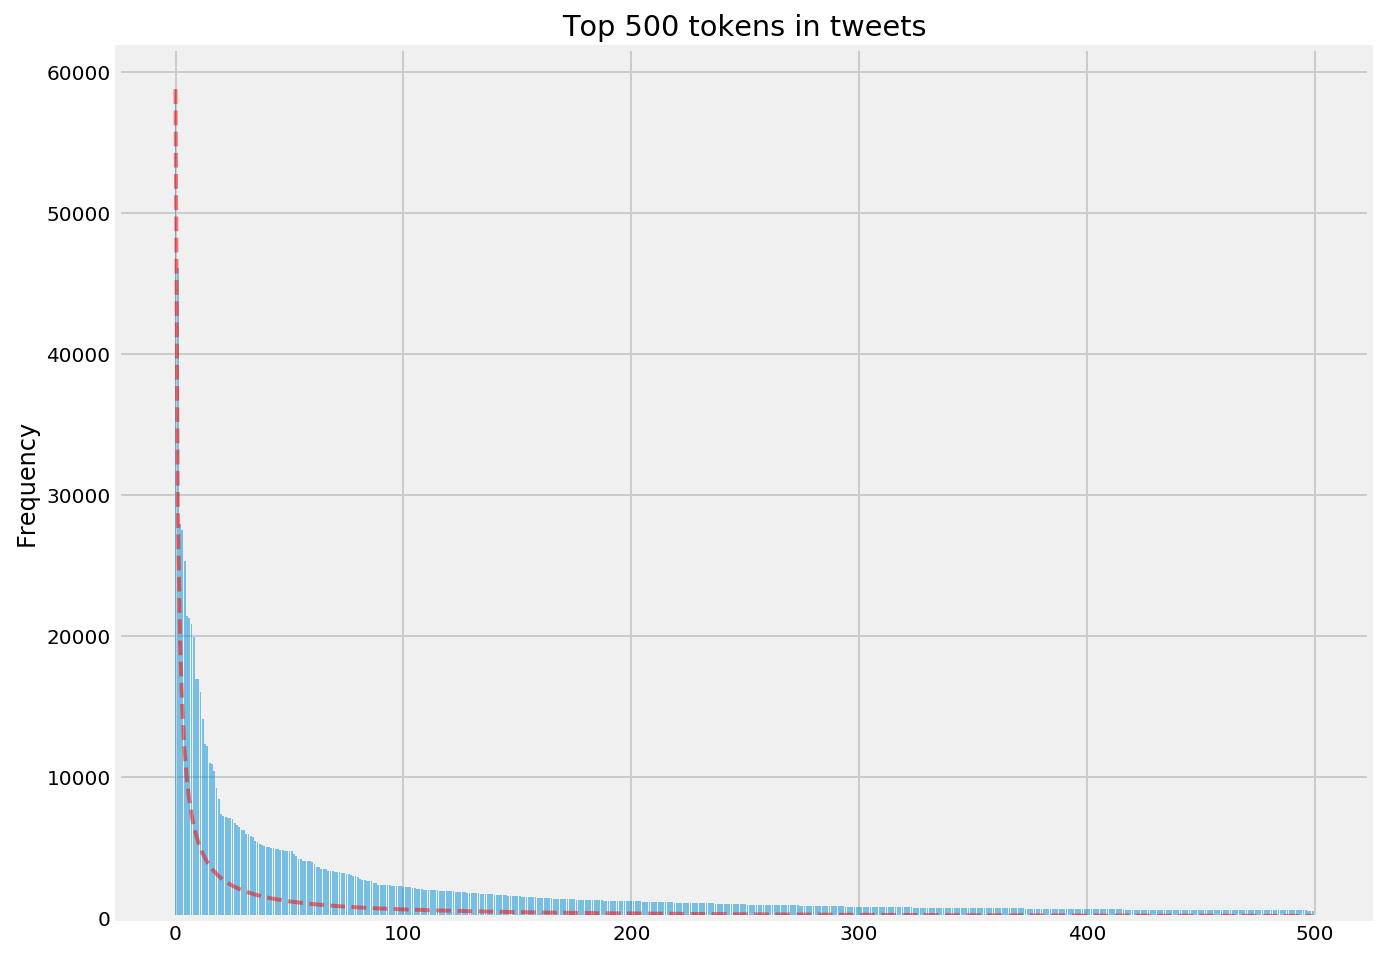

In [66]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [sorted.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, sorted.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

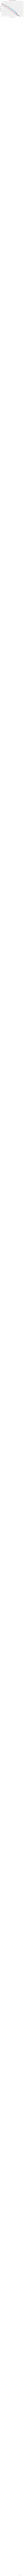

In [67]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,8), frameon=False, dpi=30)
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
    
#plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# fig.add_axes([0, 0, 1, 1])
# ax = plt.gca()

# corners = ((x1, y1), (x2, y2))
# ax.update_datalim(corners)

Text(0.5, 1.0, 'Top 50 tokens in tweets')

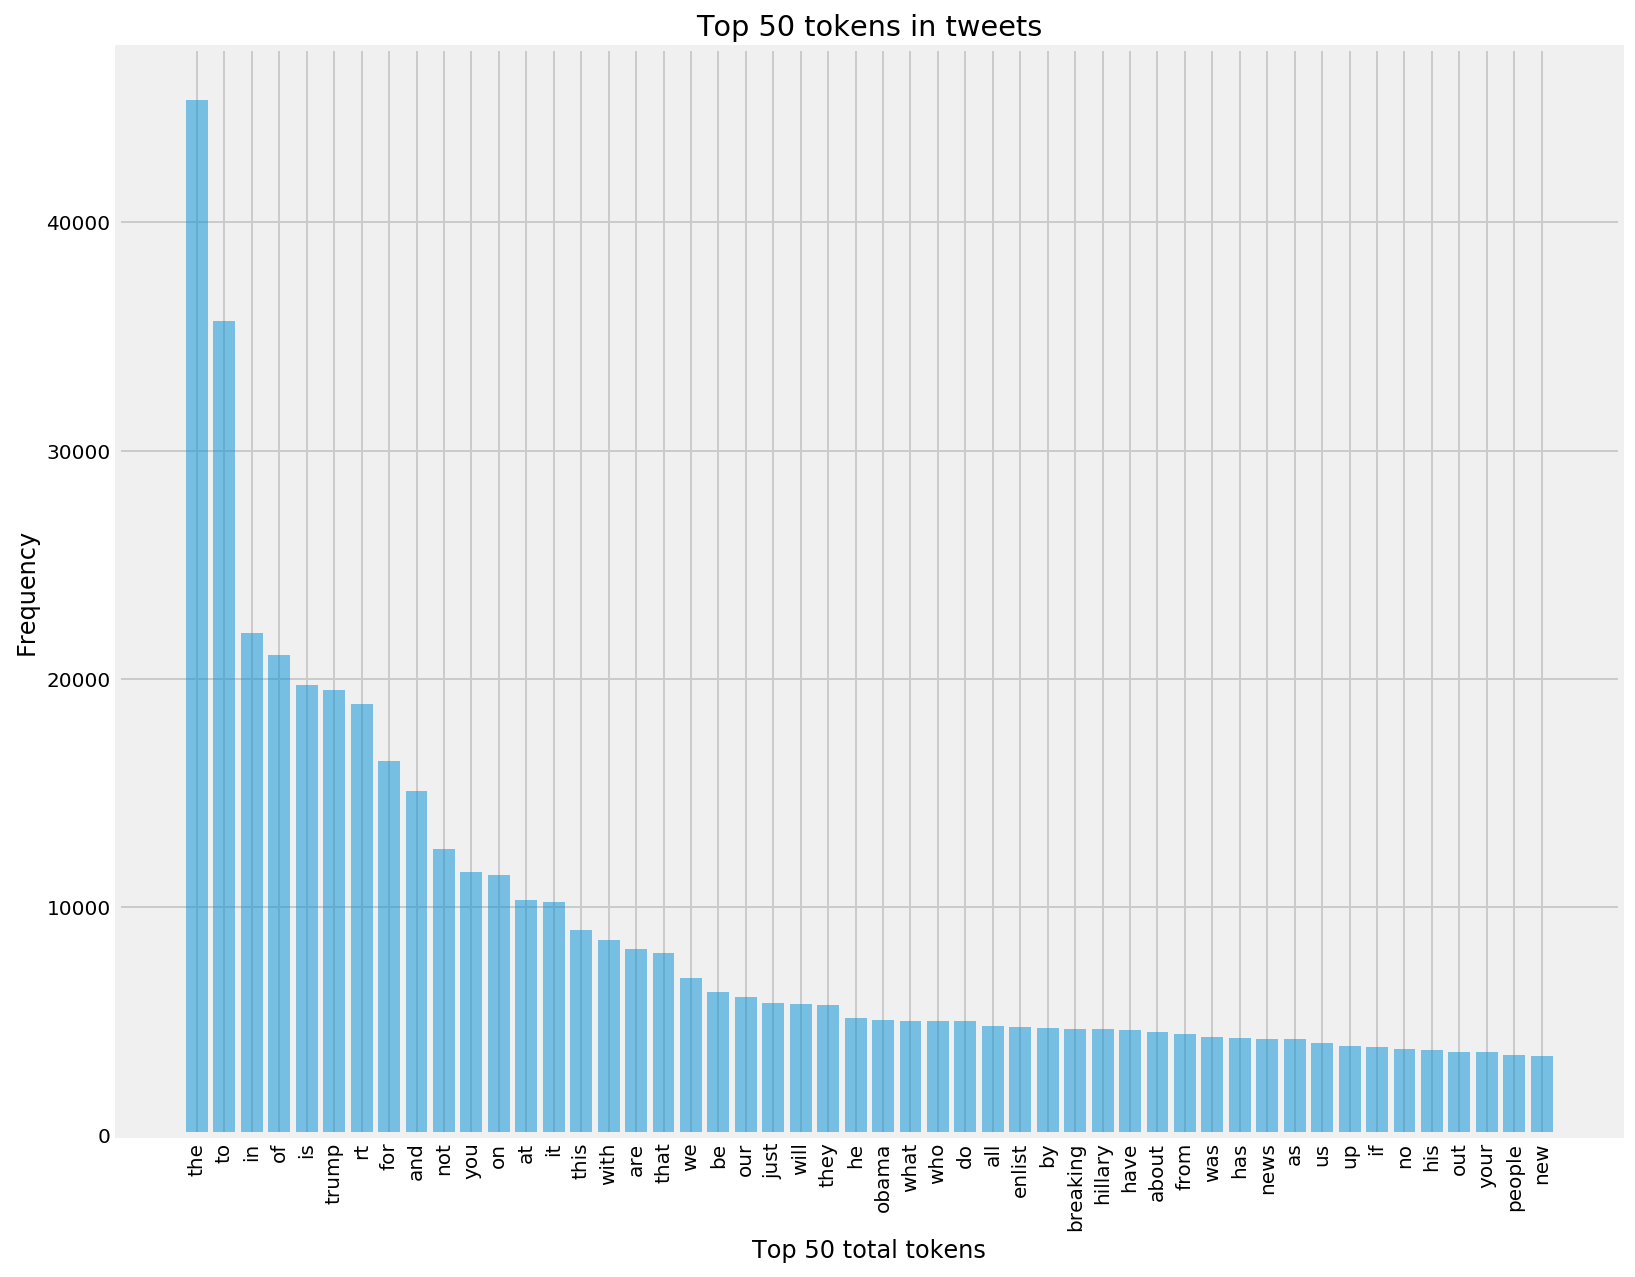

In [79]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, sorted.sort_values(by='Right', ascending=False)['Right'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, sorted.sort_values(by='Right', ascending=False)['Right'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 total tokens')
plt.title('Top 50 tokens in tweets')

Text(0.5, 1.0, 'Right Frequency vs Left Frequency')

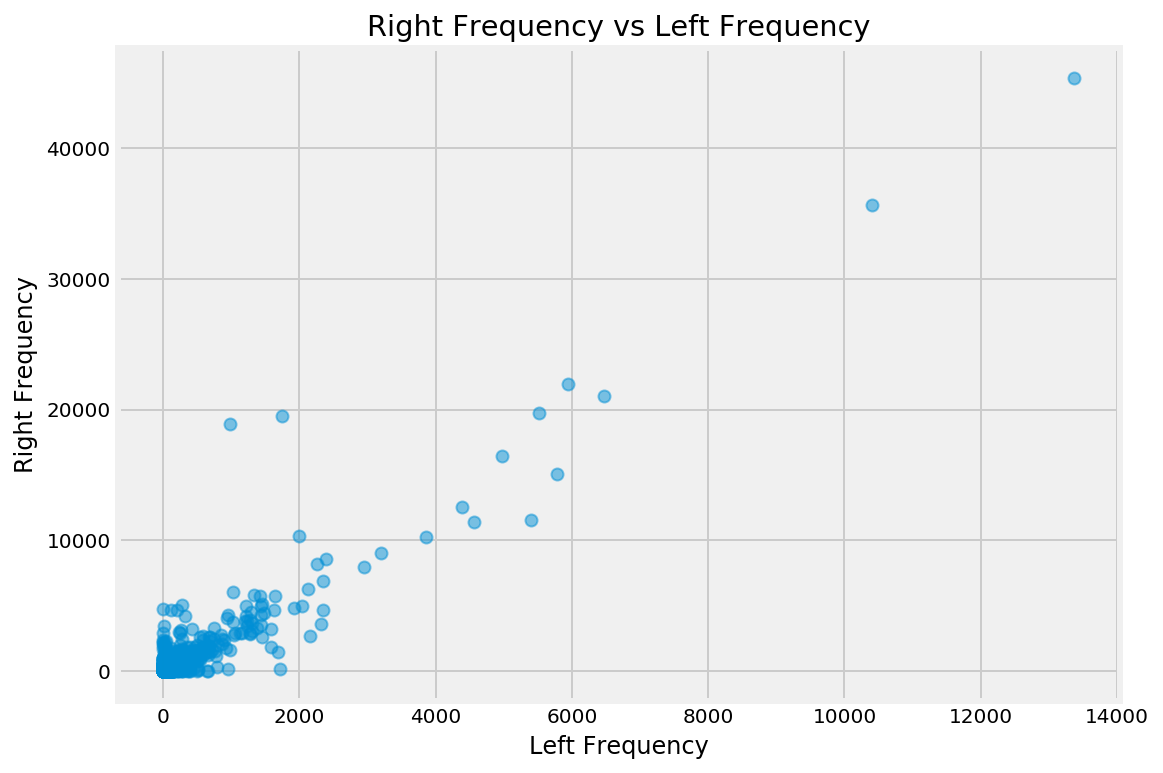

In [77]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="Left", y="Right",fit_reg=False, scatter_kws={'alpha':0.5},data=sorted)
plt.ylabel('Right Frequency')
plt.xlabel('Left Frequency')
plt.title('Right Frequency vs Left Frequency')

In [86]:
sorted['Right'] = sorted['Right'] * 1./sorted['total']
sorted.sort_values(by='total', ascending=False).iloc[:20]

Right   Left  total
the    1.103163e-24  13374  58754
to     3.731037e-24  10408  46067
in     4.630189e-23   5939  27933
of     4.849021e-23   6463  27518
is     7.601796e-23   5516  25259
for    1.716164e-22   4971  21385
trump  2.109968e-22   1750  21266
and    1.831001e-22   5784  20857
rt     3.050689e-22    987  19893
you    4.863921e-22   5403  16954
not    5.371305e-22   4379  16902
on     6.873168e-22   4558  15973
it     1.310703e-21   3851  14085
at     2.980822e-21   1986  12298
this   2.743531e-21   3195  12188
that   4.672466e-21   2950  10934
with   5.047731e-21   2383  10914
are    6.368185e-21   2254  10424
we     1.123037e-20   2342   9214
be     1.803742e-20   2130   8381

#### Remove Stop Words

In [9]:
my_df.groupby('account_type').size()
#righty = my_df.groupby('account_type' = "Right")

account_type
?                600
Arabic            62
Commercial       321
French            22
German          1291
Hashtager      27291
Italian         6275
Koch             383
Left           35726
Right         112744
Russian         8694
Spanish            1
local           8905
dtype: int64

In [10]:
hashtag = my_df.loc[my_df['account_type'] == 'Hashtager']
print(hashtag)

                                                     text account_type
10931         this week hosted by is itwasjustthatonetime    Hashtager
10932   the time spent by senators of the president ow...    Hashtager
10933   todayisgoingtobegreatbecause choose to not giv...    Hashtager
10934   in all seriousness if sessions goes after porn...    Hashtager
10935              todayisgoingtobegreatbecause have wine    Hashtager
...                                                   ...          ...
195106  falldepressionreasons my beard is not hipster ...    Hashtager
195107        the white girl armies falldepressionreasons    Hashtager
195108                   beach snow falldepressionreasons    Hashtager
195109  having to get up when it dark outside falldepr...    Hashtager
195110  falldepressionreasons it my birthday and hate ...    Hashtager

[27291 rows x 2 columns]


In [11]:
righty = my_df.loc[my_df['account_type'] == 'Right']
print(righty)

                                                     text account_type
0       we have sitting democrat us senator on trial f...        Right
1       marshawn lynch arrives to game in anti trump s...        Right
2       daughter of fallen navy sailor delivers powerf...        Right
3       just in president trump dedicates presidents c...        Right
4        respecting our national anthem standforouranthem        Right
...                                                   ...          ...
195983  new emails expose something horrible about de ...        Right
195984  nbc just sided with kim jong un over president...        Right
195985      breaking doj offers hillary clinton plea deal        Right
195986                 wow we dodged massive bullet folks        Right
195987         breaking the fbi raided paul manafort home        Right

[112744 rows x 2 columns]


In [12]:
lefty = my_df.loc[my_df['account_type'] == 'Left']
print(lefty)

                                                     text account_type
3715            blacklivesmatter blm equality equalrights         Left
3716    so if you pay more taxes you have more rights ...         Left
3717                                          some of you         Left
3718    black students force the university to divest ...         Left
3719    racist maine gov on drug problem racistscum idiot         Left
...                                                   ...          ...
196229  be patient trust in allah problems and hardshi...         Left
196230                         is zootopia worth watching         Left
196231  artwork by bohan visit for more art twitart ku...         Left
196232  when you ve made mistake admit it and correct ...         Left
196233  true test of good character is when we can mai...         Left

[35726 rows x 2 columns]


In [13]:
rusky = my_df.loc[my_df['account_type'] == 'Russian']
print(rusky)

                           text account_type
362                     reuters      Russian
363            porsche panamera      Russian
364                        lada      Russian
365       mail ru google chrome      Russian
366                  aliexpress      Russian
...                         ...          ...
196152                       ru      Russian
196153                  cadbury      Russian
196154     ap photo anupam nath      Russian
196155           opel chevrolet      Russian
196156  apple pencil appleevent      Russian

[8694 rows x 2 columns]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
#my_df = pd.read_csv('sorted.csv',index_col=0, encoding='utf_8')
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(righty.text)
cvec.fit(lefty.text)
cvec.fit(rusky.text)
cvec.fit(hashtag.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
left_matrix = cvec.transform(lefty.text)
right_matrix = cvec.transform(righty.text)
rusky_matrix = cvec.transform(rusky.text)
hash_matrix = cvec.transform(hashtag.text)

In [16]:
%%time
neg_batches = np.linspace(0,196000,10).astype(int)
i=0
hash_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(hash_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    hash_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

21777 entries' term freuquency calculated
43555 entries' term freuquency calculated
65333 entries' term freuquency calculated
87111 entries' term freuquency calculated
108888 entries' term freuquency calculated
130666 entries' term freuquency calculated
152444 entries' term freuquency calculated
174222 entries' term freuquency calculated
196000 entries' term freuquency calculated
CPU times: user 784 ms, sys: 1.21 s, total: 1.99 s
Wall time: 4 s


In [17]:
%%time
neg_batches = np.linspace(0,196000,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(right_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

21777 entries' term freuquency calculated
43555 entries' term freuquency calculated
65333 entries' term freuquency calculated
87111 entries' term freuquency calculated
108888 entries' term freuquency calculated
130666 entries' term freuquency calculated
152444 entries' term freuquency calculated
174222 entries' term freuquency calculated
196000 entries' term freuquency calculated
CPU times: user 2.75 s, sys: 3.9 s, total: 6.65 s
Wall time: 7.58 s


In [18]:
%%time
pos_batches = np.linspace(0,192000,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(left_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

21333 entries' term freuquency calculated
42666 entries' term freuquency calculated
64000 entries' term freuquency calculated
85333 entries' term freuquency calculated
106666 entries' term freuquency calculated
128000 entries' term freuquency calculated
149333 entries' term freuquency calculated
170666 entries' term freuquency calculated
192000 entries' term freuquency calculated
CPU times: user 861 ms, sys: 1.21 s, total: 2.07 s
Wall time: 2.18 s


In [19]:
%%time
pos_batches = np.linspace(0,192000,10).astype(int)
i=0
rus_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(rusky_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    rus_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

21333 entries' term freuquency calculated
42666 entries' term freuquency calculated
64000 entries' term freuquency calculated
85333 entries' term freuquency calculated
106666 entries' term freuquency calculated
128000 entries' term freuquency calculated
149333 entries' term freuquency calculated
170666 entries' term freuquency calculated
192000 entries' term freuquency calculated
CPU times: user 238 ms, sys: 351 ms, total: 589 ms
Wall time: 1.1 s


In [38]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
rus = np.sum(rus_tf,axis=0)
hashy = np.sum(hash_tf,axis=0)
totalRight = 112744
totalLeft = 35726
totalRus = 8694
totalHash = 27291
total = totalLeft + totalRight + totalRus + totalHash
term_freq_df2 = pd.DataFrame([neg,pos,rus,hashy],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['right', 'left','russian','hashtager']
term_freq_df2['total'] = (term_freq_df2['right'] + term_freq_df2['left'] + term_freq_df2['russian'] + term_freq_df2['hashtager']) / total * 100
term_freq_df2['right'] = (term_freq_df2['right'] / totalRight) * 100
term_freq_df2['left'] = (term_freq_df2['left'] / totalLeft) * 100
term_freq_df2['russian'] = (term_freq_df2['russian'] / totalRus) * 100
term_freq_df2['hashtager'] = (term_freq_df2['hashtager'] / totalHash) * 100
s2 = term_freq_df2.drop(['just', 'like','new','people','know','video','make','photo','photos',
                         'man','time','news','breaking','look','did','day','want','good','really','ll'])
df2_total_sorted = s2.sort_values(by='total', ascending=False).iloc[:10]
df2_left_sorted = s2.sort_values(by='left', ascending=False).iloc[:10]
df2_right_sorted = s2.sort_values(by='right', ascending=False).iloc[:10]
df2_rus_sorted = s2.sort_values(by='russian', ascending=False).iloc[:10]
df2_hash_sorted = s2.sort_values(by='hashtager', ascending=False).iloc[:10]

In [39]:
df2_left_sorted.head(20)

right      left   russian  hashtager      total
trump             17.310012  4.898393  1.288245   2.227841  11.919438
blacklivesmatter   0.109984  4.797626  0.000000   0.032978   1.001328
black              1.258604  4.708056  0.172533   0.633909   1.783091
rt                16.768963  2.762694  1.610306   0.340772  10.911062
police             1.437771  2.754297  0.356568   0.179546   1.455640
music              0.137480  2.681520  0.299057   0.333443   0.666829
white              2.095899  2.507977  0.126524   0.813455   1.893145
cops               0.286490  2.228069  0.011502   0.084277   0.619663
love               1.012914  2.163690  0.299057   1.942032   1.339622
nowplaying         0.008870  1.858590  0.667127   0.007328   0.397929

In [40]:
df2_right_sorted.head(20)

right      left   russian  hashtager      total
trump      17.310012  4.898393  1.288245   2.227841  11.919438
rt         16.768963  2.762694  1.610306   0.340772  10.911062
obama       4.492479  0.766948  0.391074   0.527646   2.990973
hillary     4.127936  0.551419  0.184035   0.795134   2.756228
maga        3.065352  0.033589  0.023004   0.043971   1.887723
america     2.819662  1.164418  0.218542   0.630244   2.052533
president   2.801923  0.744556  0.379572   1.014987   2.024884
clinton     2.651139  0.629793  0.483092   0.465355   1.834052
media       2.558894  0.702570  0.460087   0.190539   1.750020
white       2.095899  2.507977  0.126524   0.813455   1.893145

In [41]:
df2_rus_sorted.head(20)

right      left   russian  hashtager      total
russia    1.069680  0.411465  2.415459   0.183211   0.874468
apple     0.094905  0.100767  1.863354   0.080613   0.177279
rt       16.768963  2.762694  1.610306   0.340772  10.911062
google    0.257220  0.179141  1.506786   0.135576   0.282996
iphone    0.021287  0.047584  1.368760   0.106262   0.102464
trump    17.310012  4.898393  1.288245   2.227841  11.919438
russian   0.402682  0.235123  1.184725   0.087941   0.360522
cnn       1.572589  0.128758  1.081205   0.051299   1.044699
syria     0.345916  0.111963  1.012192   0.029314   0.285164
times     0.570319  0.431059  0.885668   0.183211   0.500935

In [42]:
df2_hash_sorted.head(20)

right      left   russian  hashtager      total
words                     0.376960  0.428260  0.103520   5.994650   1.205172
trump                    17.310012  4.898393  1.288245   2.227841  11.919438
love                      1.012914  2.163690  0.299057   1.942032   1.339622
obamanextjob              0.000000  0.000000  0.000000   1.887069   0.279201
think                     1.183212  1.200806  0.138026   1.366751   1.164512
life                      0.719329  1.413536  0.287555   1.289802   0.917839
ihatepokemongobecause     0.000000  0.000000  0.000000   1.282474   0.189748
todolistbeforechristmas   0.000000  0.000000  0.000000   1.242168   0.183785
presentstrumpgot          0.000000  0.000000  0.000000   1.157891   0.171315
thingsyoucantignore       0.000000  0.000000  0.000000   1.154227   0.170773

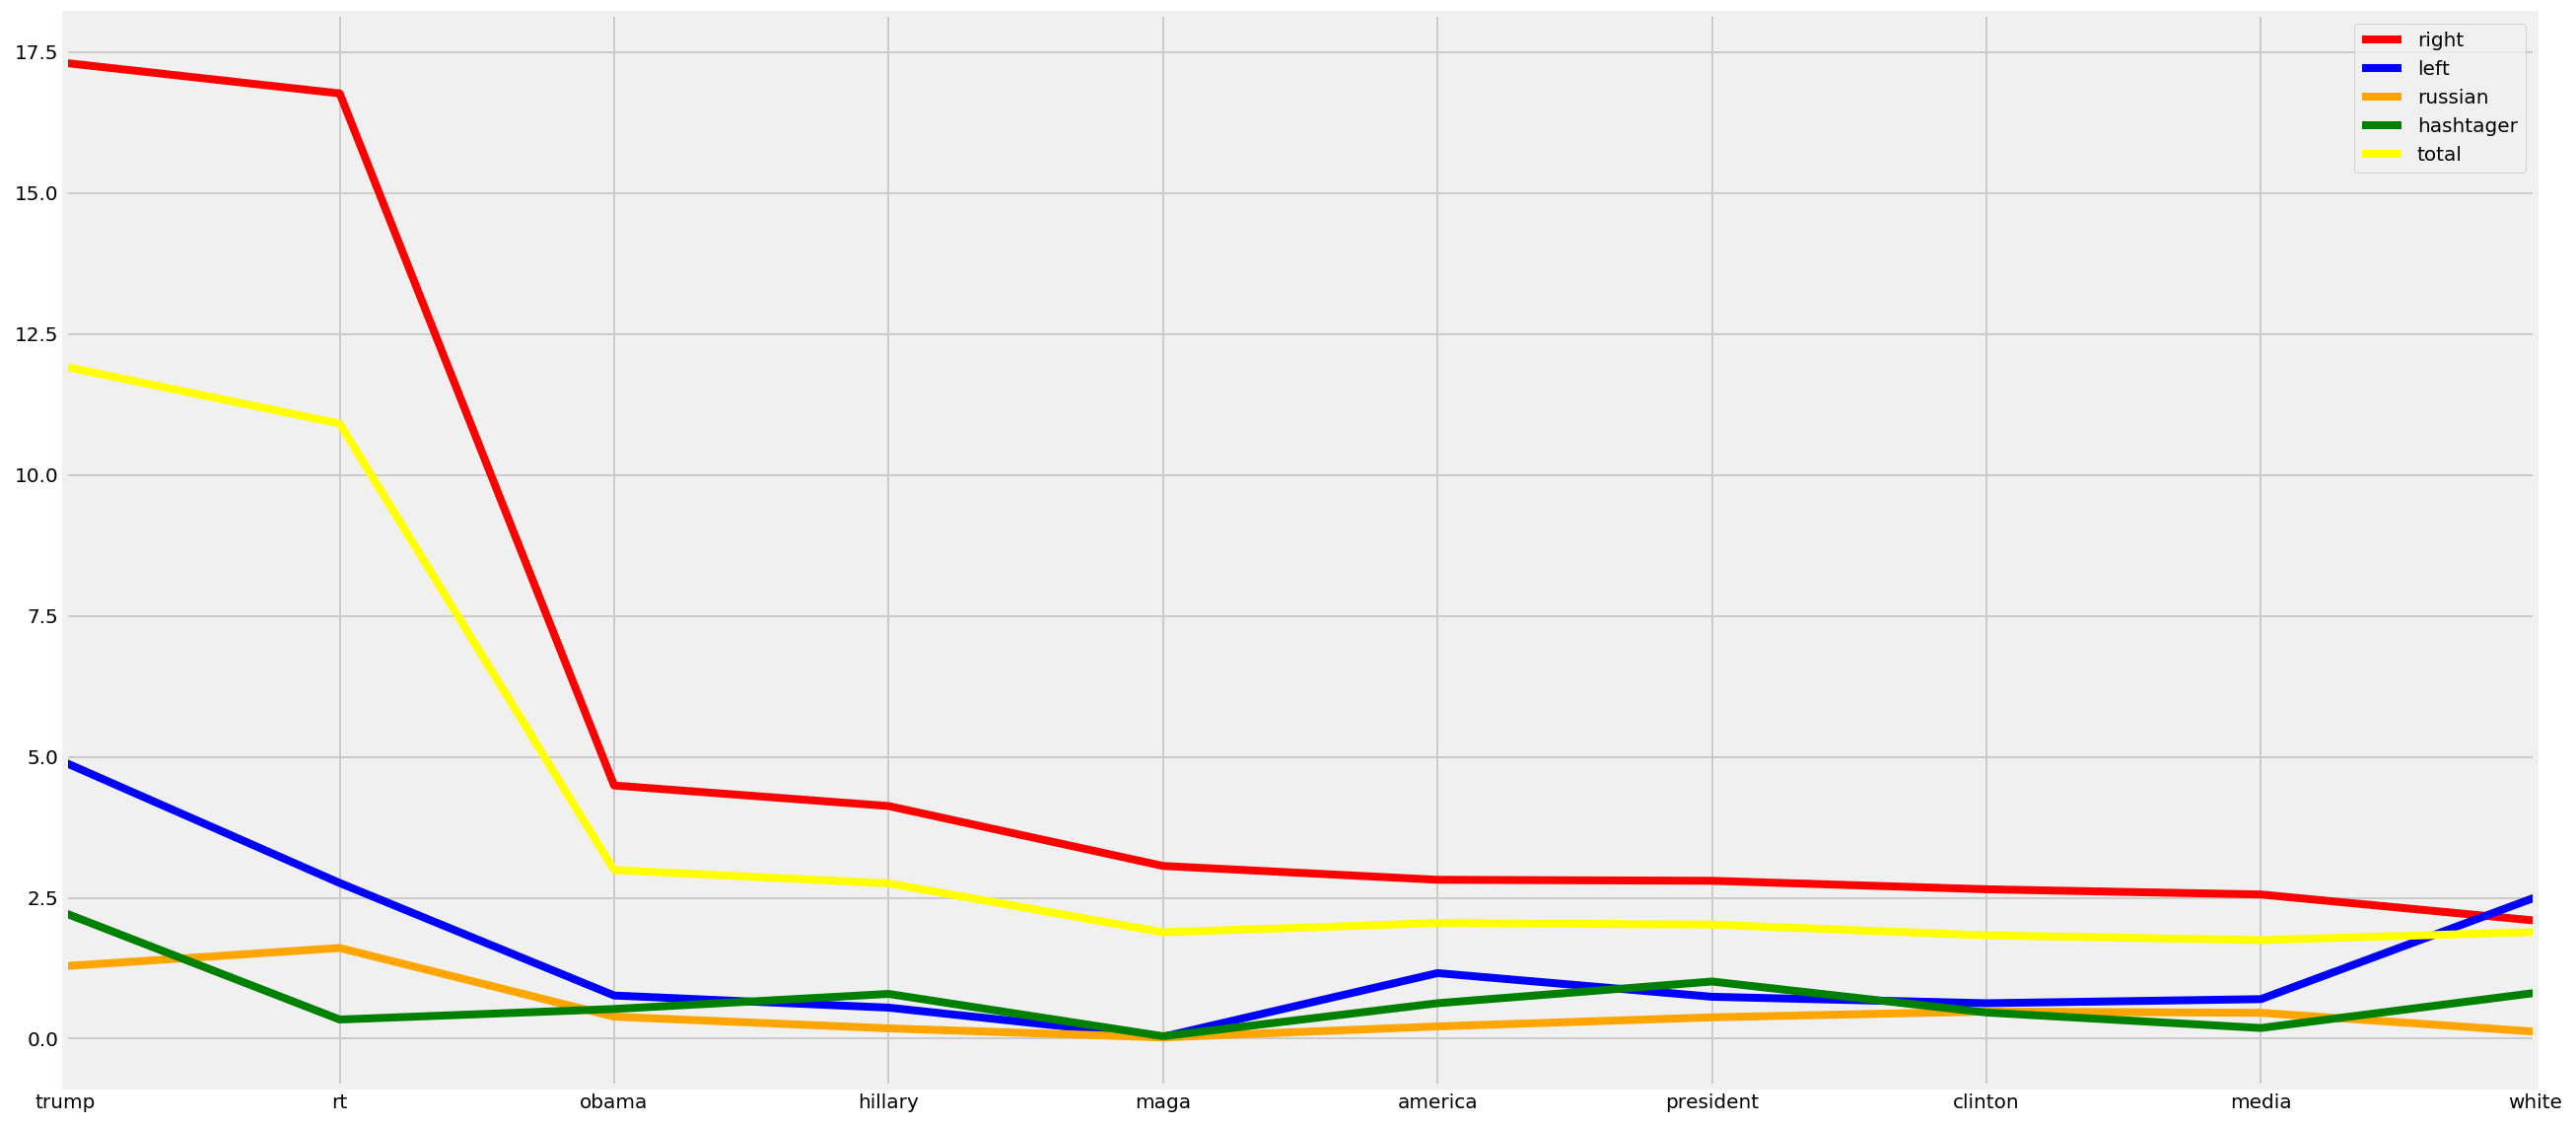

In [43]:
df2_right_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

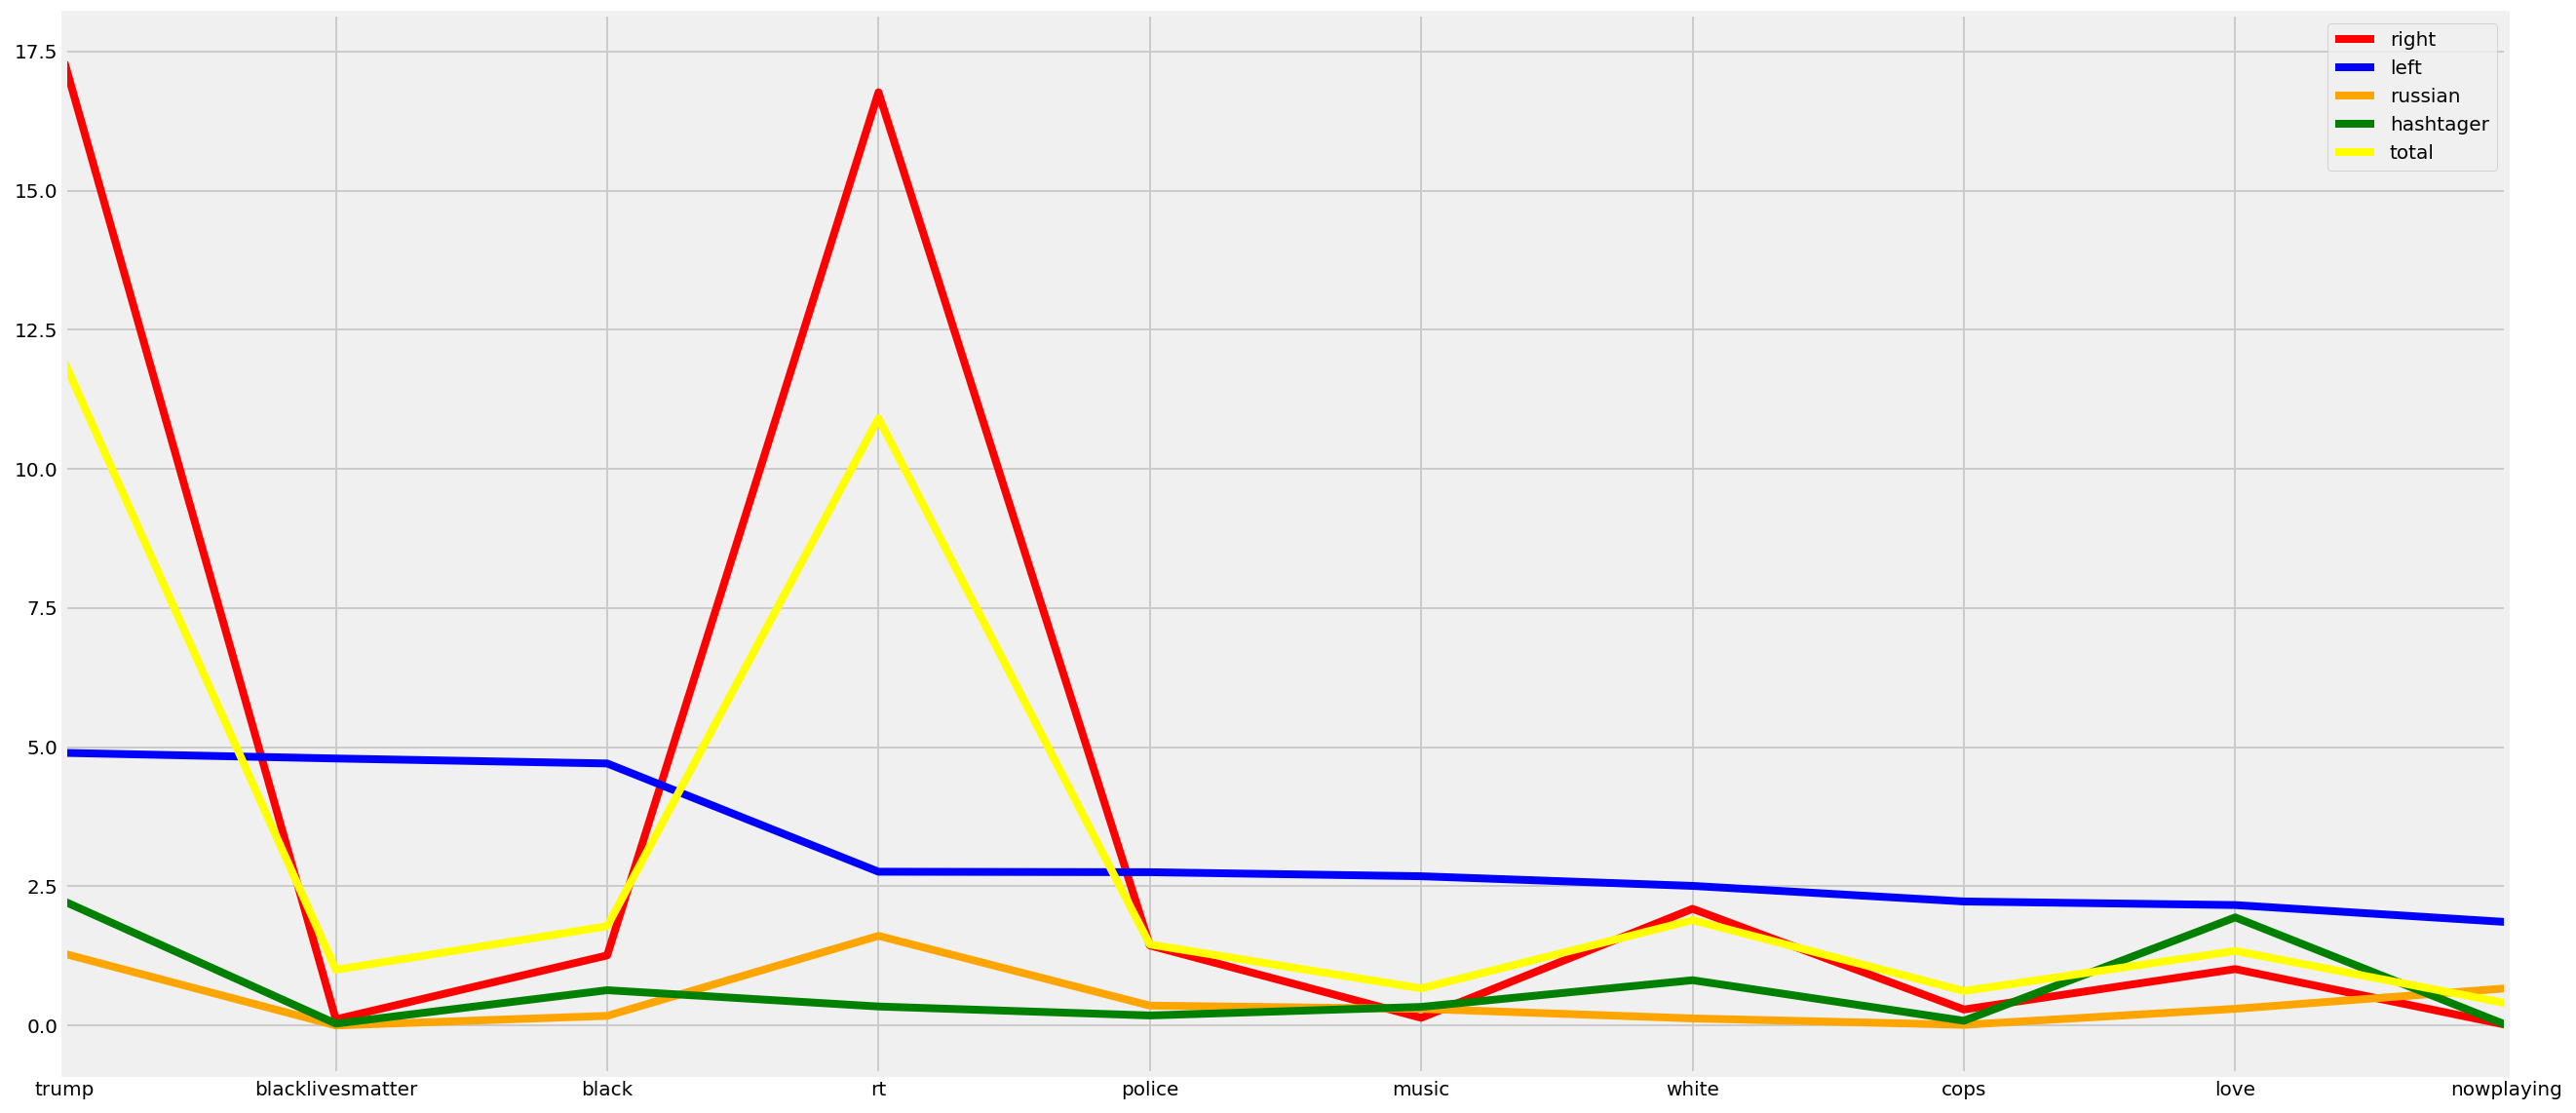

In [44]:
df2_left_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

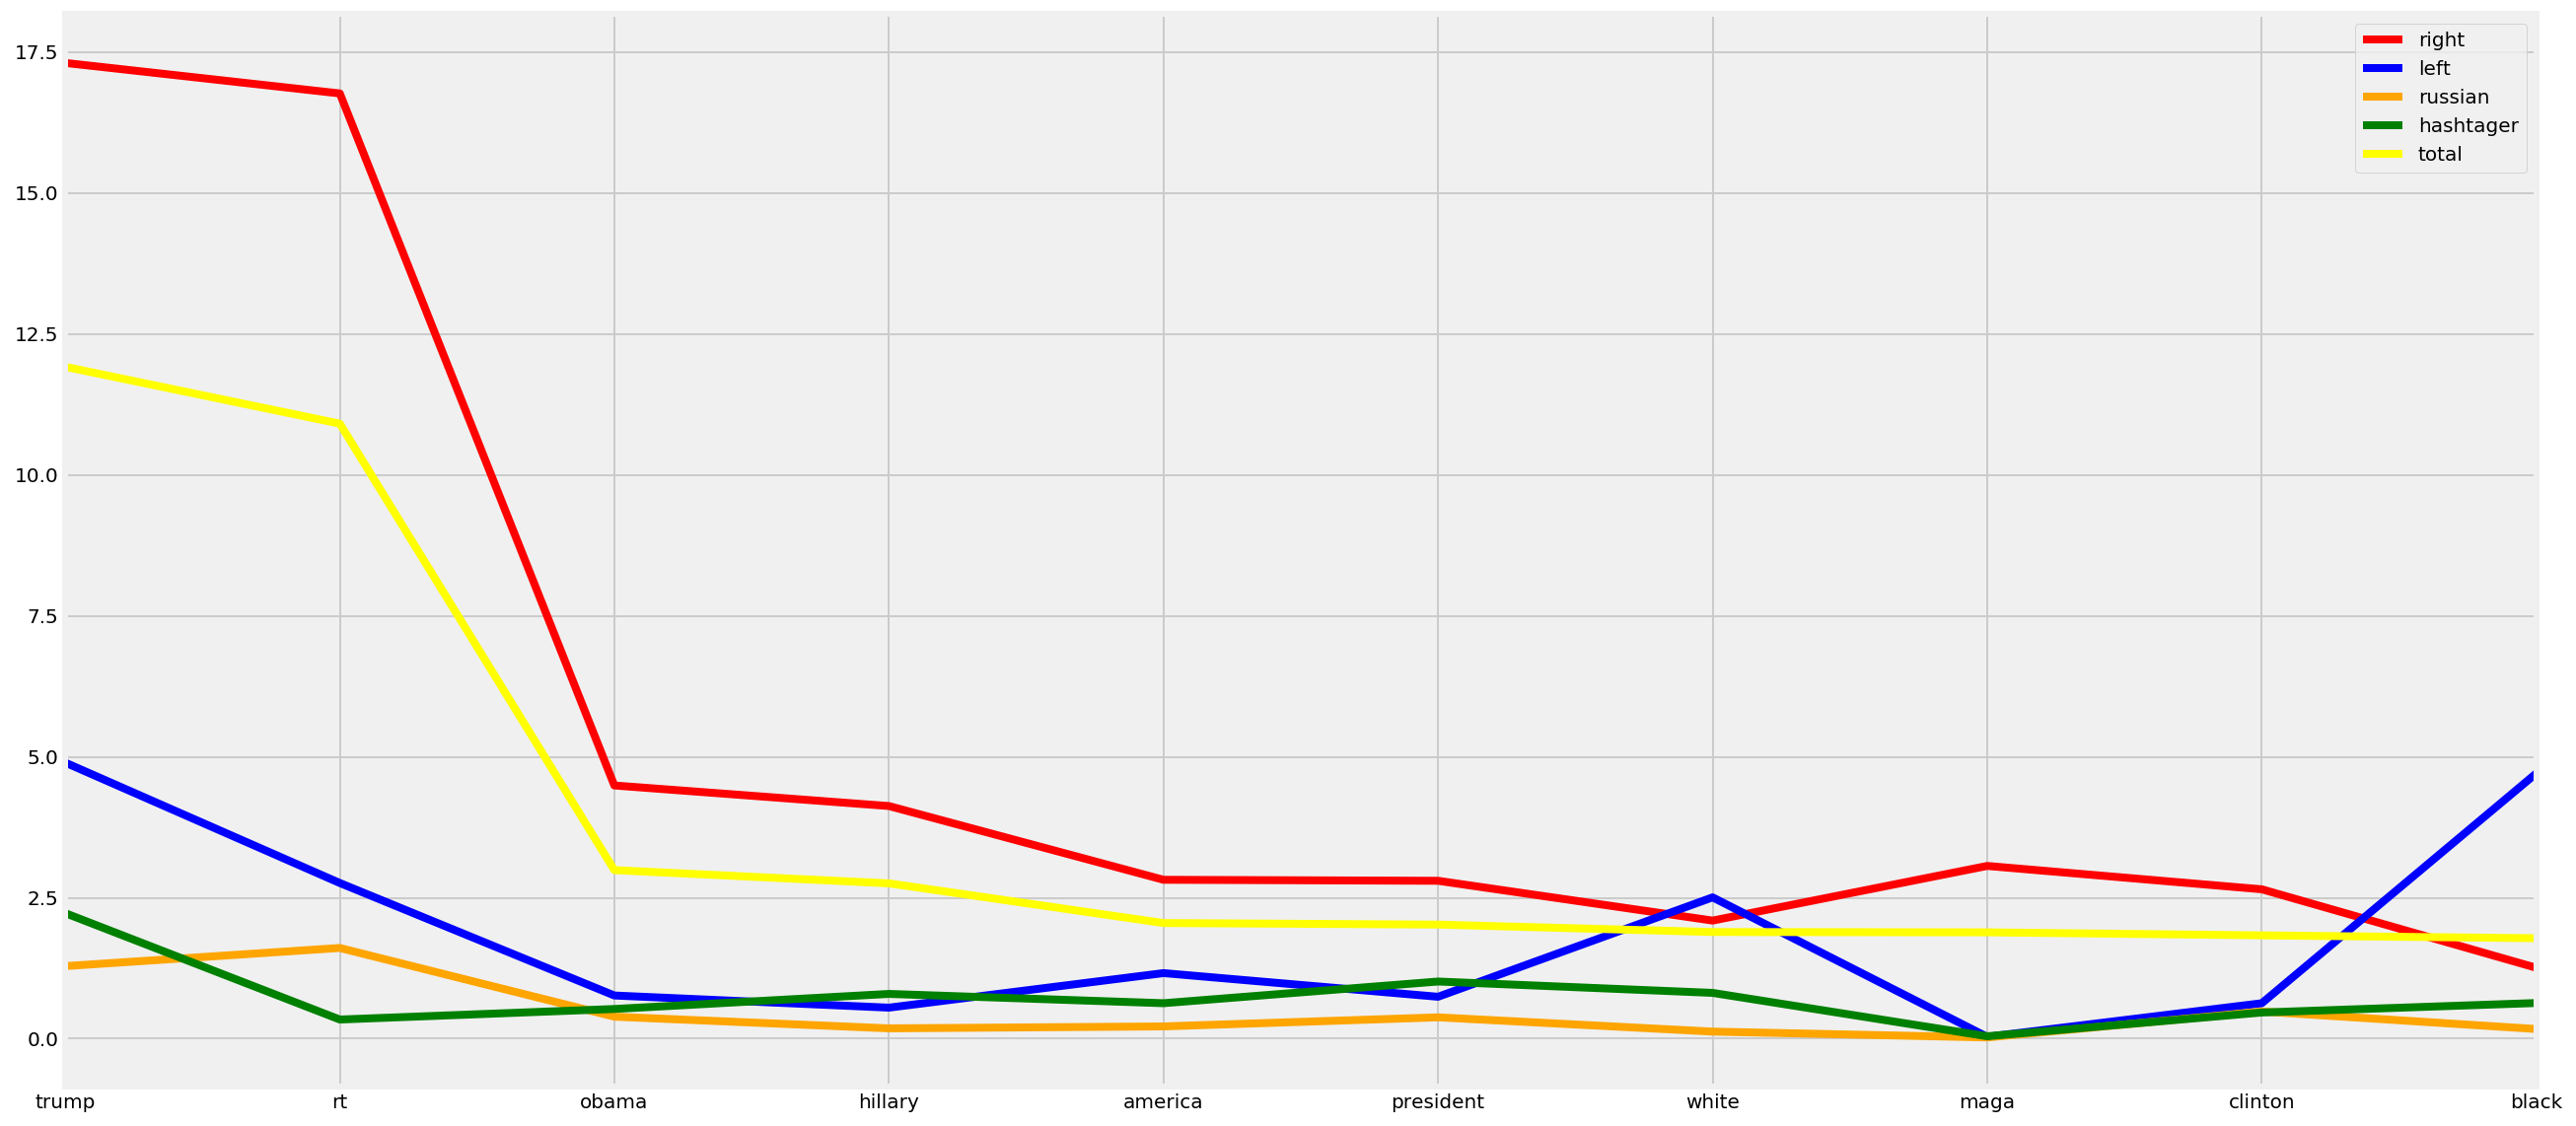

In [45]:
df2_total_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

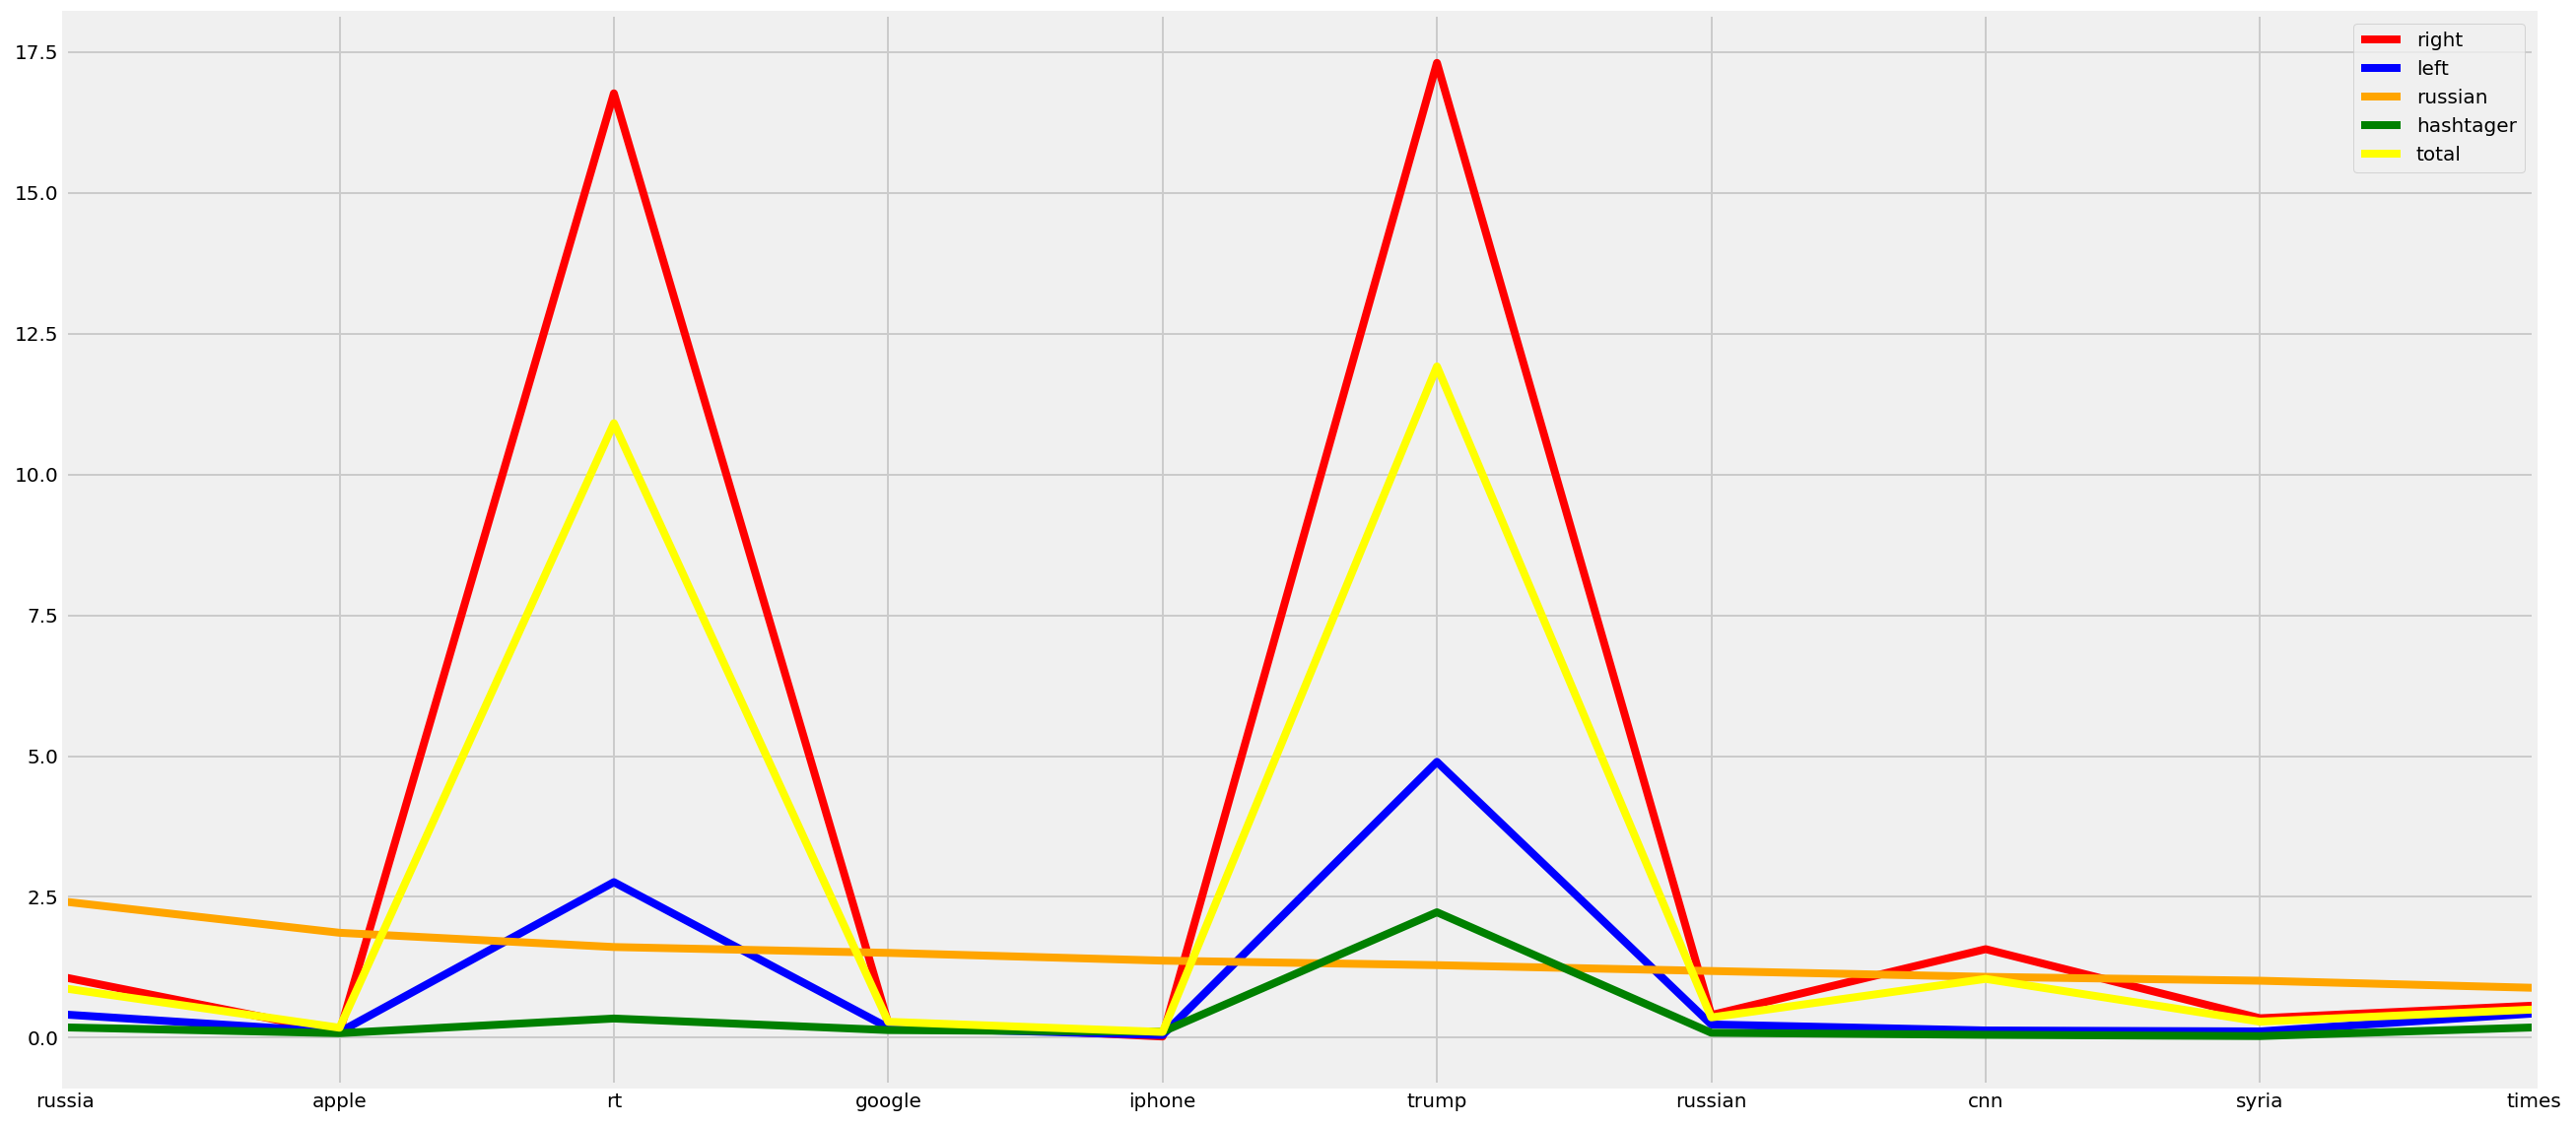

In [46]:
df2_rus_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

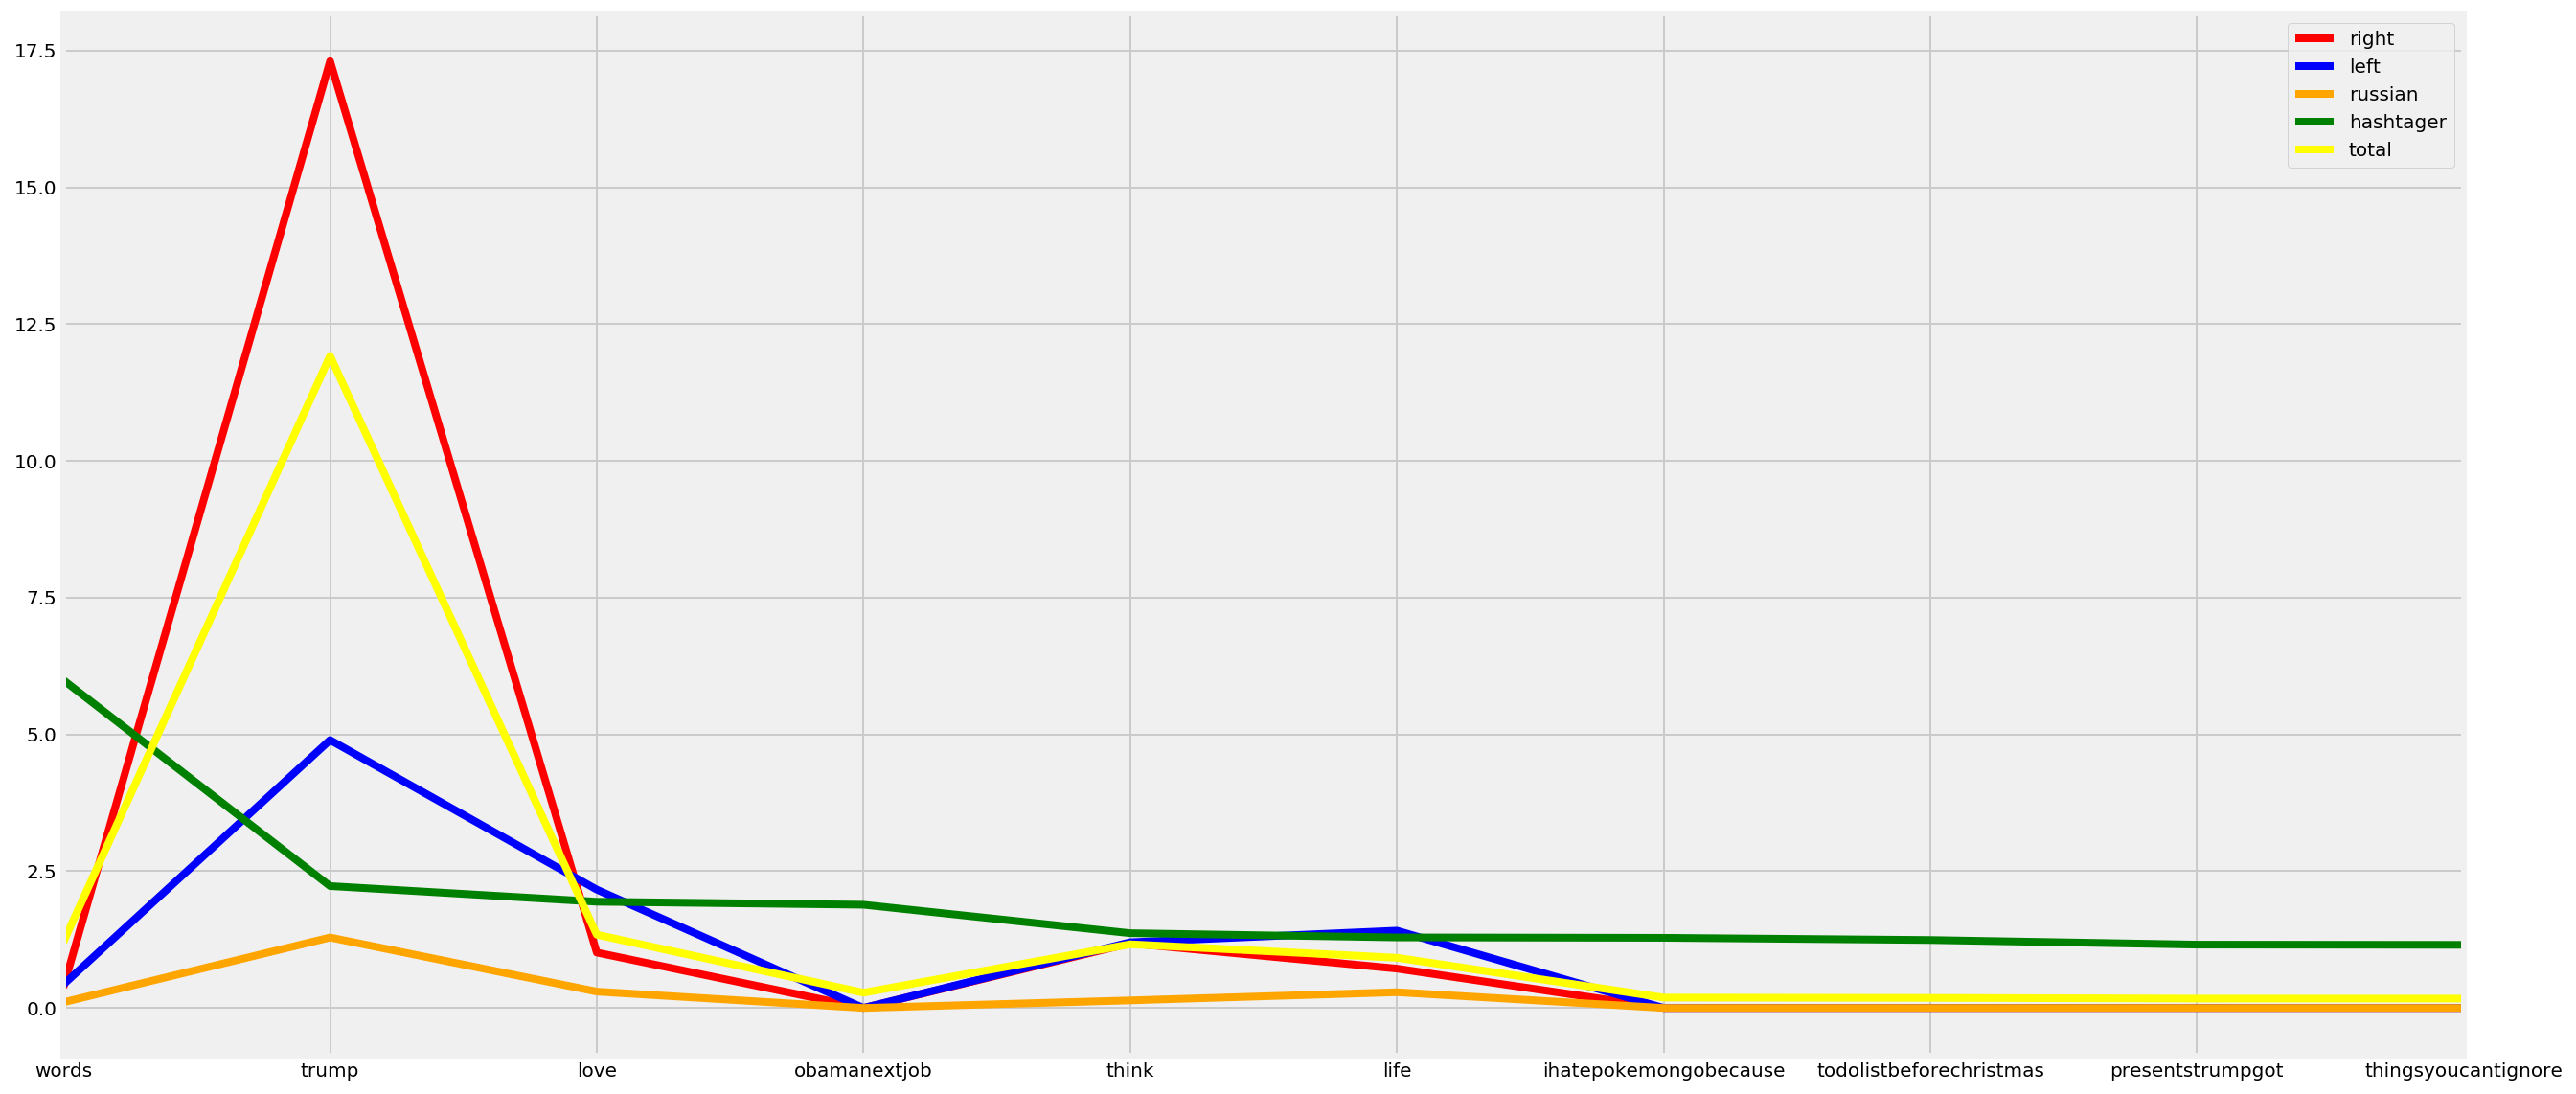

In [47]:
df2_hash_sorted.plot(kind='line', color=['red', 'blue','orange','green','yellow'],figsize=(20,10))

In [87]:
s2.head()

right      left   russian  hashtager     total
aa           0.007983  0.013995  0.000000   0.018321  0.010301
aarp         0.004435  0.005598  0.000000   0.014657  0.005964
ab           0.012418  0.008397  0.011502   0.010993  0.011385
abc          0.155219  0.041986  0.034507   0.010993  0.106259
abercrombie  0.009757  0.005598  0.000000   0.018321  0.009758